# Проект "Анализ столкновений птиц с воздушными судами"

## Описание проекта

В данном проекте я буду анализировать данные столкновений птиц с воздушными судами. Этот проект выполняется индивидуально, но в подготовке данных участвуют специалисты в области data engineer (подготовка датасетов), а результаты будут использованы в работе специалистов data science (построение предсказательных моделей).

**Цель проекта** — произвести обработку сырых данных, построить визуализации и найти интересные закономерности.

**Задачи**
- Предобработка данных;
- Агрегация (по месяцам, аэропортам);
- Поиск интересных инсайтов;
- Определение корреляции одних факторов от других;
- Подготовка данных для построения модели предсказания столкновений птиц и самолётов в зависимости от погодных условий.

**Описание данных**

Всего имеется 2 датасета: data_DE_strikes_and_weather и flights_data_DE.

1. **data_DE_strikes_and_weather**
Содержит данные о столкновениях, которые получены из Федерального управления гражданской авиации США (FAA), а также данные о погоде, полученные из Национального центра экологической информации США (NCEI). Представлены следующие данные о погоде: скорость и направление ветра, состояние неба, видимость, температура воздуха, температура точки росы, атмосферное давление. Эти показатели находятся в полях WND, CIG, VIS, TMP, DEW, SLP соответственно.

2. **flights_data_DE** Содержит данные о загруженности аэропортов, которые получены из Бюро транспортной статистики США (BTS). Представлена информация о количестве внутренних и международных рейсов, общем количестве рейсов, названии аэропорта, направлении рейса (в или из аэропорта).

WND = WIND-OBSERVATION. Композитное поле с наблюдениями ветра (140,5,N,0052,5)
- 140 - направление ветра: угол между истинным севером и направлением, откуда дует ветер   
- 5 - Код контроля качества измерения направления ветра        
- N - Тип наблюдения ветра        
- 0052 - горизонтальная скорость ветра, единица измерения 0.1 м/c        
- 5 - Код контроля качества измерения скорости   
     
CIG = SKY-CONDITION-OBSERVATION. Композитное поле с наблюдениями неба (00518,5,M,N)
- 00518 Расстояние от поверхности до края самого низкого облака или иного объекта, закрывающего 5/8 всего небосвода, единица измерения – метры. 22000 – максимум, 99999 – значение не задано.        
- 5 Код контроля качества измерения        
- M Код метода для измерения высоты        
- N CAVOK ("Небо и видимость в порядке")

VIS = VISIBILITY-OBSERVATION. Композитное поле с наблюдениями видимости (009600,5,N,1)
- 009600 - Горизонтальное расстояние, на котором предмет может быть увиден и опознан, в метрах, максимум 160000
- 5 Код контроля качества измерения
- N Меняется ли это расстояние        
- 1 Статус качества имерения изменяемости расстояния

TMP = AIR-TEMPERATURE-OBSERVATION air temperature. Композитное поле с наблюдениями температуры воздуха (+0100,5)
- +0100 - Наблюдаемая температура воздуха, в десятых долях градуса С
- 5 Код контроля качества измерения температуры

DEW = AIR-TEMPERATURE-OBSERVATION dew point. Композитное поле с наблюдениями температуры точки росы (+0094,5)
- +0094 - Температура точки росы в десятых долях градуса С
- 5 Контроль качества   
     
SLP = AIR-PRESSURE-OBSERVATION sea level pressure. Композитное поле с наблюдениями атмосферного давления (10054,5)
- 10054 - Атмосферное давление на уровен моря, в гектопаскалях, минимум 08600, максимум 10900    
- 5 Код контроля качества измерения

Полное описание полей о погоде [здесь](https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf).

Полное описание полей о столкновениях [здесь](https://wildlife.faa.gov/assets/fieldlist.pdf)

**Ограничения данных**

FAA - все записи с 1/1/2018 по 12/31/2022.

NCEI - все записи для строчек из датасета FAA, у
которых указаны координаты. Если не указано время,
то данные за 12:00.

BTS - данные для первых 10 аэропортов по
количеству столкновений.

**Оглавление**

>[Проект "Анализ столкновений птиц с воздушными судами"](#scrollTo=cQhHIFZmJhcM)

>>[Описание проекта](#scrollTo=ZiKCq3pAJyT3)

>>[Предобработка данных](#scrollTo=y6CIu2iBq3oz)

>>>[Получение данных](#scrollTo=j7OYNytAqvm9)

>>>[Пропуски и дубликаты](#scrollTo=56HNFkiVXx-3)

>>>[Информация о погоде](#scrollTo=HQr3V6JDycna)

>>>[Группировка столбцов](#scrollTo=-HL6vtdMwnQO)

>>>[Дата и время](#scrollTo=F7NLksG30vQe)

>>>[Отбор птиц](#scrollTo=57W7l76nahqQ)

>>>[Объединение таблиц](#scrollTo=VRvugyHmiimV)

>>>[Сохранение полученных таблиц](#scrollTo=p_NjbCH1oc0r)

>>>[Вывод по предобработке](#scrollTo=tDZuw8SjrwiP)

>>[Исследовательский анализ данных](#scrollTo=-96lH3SOQPwE)

>>>[Топ-10 аэропортов по проценту столкновений](#scrollTo=O8S-eyeGTjTJ)

>>>[География столкновений](#scrollTo=aIvrnDRogkLk)

>>>[Даты столкновений](#scrollTo=-VZdtB8xAOLT)

>>>>[3.1. Динамика для топ-10 аэропортов](#scrollTo=a9MGsm3lT5bS)

>>>[Время столкновений](#scrollTo=aSnXFInNUCs2)

>>>>[4.1. День/ночь](#scrollTo=hyugVerAJiQP)

>>>>[4.2. По часам](#scrollTo=5_4HHYqqJmlZ)

>>>>[4.3. Корреляции по времени суток для топ-10 аэропортов](#scrollTo=u4RjgfbDpKWk)

>>>>[4.4. По сезонам](#scrollTo=rmf_yvOeJrRb)

>>>>[4.5. Корреляции по сезону года для топ-10 аэропортов](#scrollTo=cwgpD7rs_Ti6)

>>>>[4.6. Проверка гипотезы №1](#scrollTo=G5nYL9ZPTHBb)

>>>[Момент столкновения](#scrollTo=tep1r8AEfzNX)

>>>>>[5.1. Корреляции для всех аэропортов](#scrollTo=vDx5IkYWGI1Q)

>>>>[5.2. Проверка гипотезы №2](#scrollTo=qFePvi65lz3T)

>>>[Высота полета](#scrollTo=Slzs7vzfb5IK)

>>>>[6.1. Корреляции для всех аэропортов](#scrollTo=plOb0qBxljM9)

>>>[Виды птиц](#scrollTo=so9zj-5RN8lt)

>>>>[7.1. Птицы и летучие мыши](#scrollTo=fsZB-bQCp-r8)

>>>>[7.2. Птицы из топ-10 аэропортов](#scrollTo=IPXeaXwAqcnw)

>>>[Влияние погодных условий](#scrollTo=dZeLDXkDimC-)

>>>>[8.1. Корреляции для топ-10 аэропортов](#scrollTo=JcIchtaOxEJ9)

>>[Общие выводы](#scrollTo=dxFIcuXTbVS9)

>>>>[Выводы по предобработке](#scrollTo=FiDKCfHr72HH)

>>>>[Выводы по анализу данных](#scrollTo=PcdmFsXz8AfJ)

>>>>[Перспективы исследования](#scrollTo=y146B2HcAtLQ)



## Предобработка данных



### 1. Получение данных

Файл requirements.txt доступен [по ссылке](https://drive.usercontent.google.com/download?id=1EdHD2_wqhhCIbd9UwYafpeG-RqugryLF&export=download&authuser=0&confirm=t&uuid=0a667a36-1499-44a2-a839-3dc45a1fb774&at=APZUnTVmuYoX-2RIYIwJ_GrY655H:1697284615024).

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import json
from google.colab import drive
from scipy import stats as st
from datetime import timedelta
from dateutil.parser import parse

In [2]:
pip install -U kaleido

In [3]:
csv_url1 = 'https://drive.usercontent.google.com/download?id=1A8dQhlDOHmxvpgRTj839X7L0m8vamApN&export=download&authuser=0&confirm=t&uuid=5f7041d1-de19-46b7-b082-0b566da98a0e&at=APZUnTUAXSBYo4WO8zzIdW0p-R91:1696936066094'
csv_url2 = 'https://drive.usercontent.google.com/download?id=14ktteV9tRLw2gDW7tOkn_ywMzFaB4U91&export=download&authuser=0&confirm=t&uuid=fdb3e410-8b69-471d-bb4a-c1d915e77bc0&at=APZUnTVDYl95d1bh1-EljZ1amXrp:1696936066746'

try:
    strikes_df = pd.read_csv(csv_url1, sep = ',', dtype={2:str, 91:str, 99:str})
    flights_df = pd.read_csv(csv_url2, sep = '|')
except Exception as e:
    print(type(e).__name__)

In [4]:
# Убираем предупреждения
warnings.filterwarnings('ignore')

In [5]:
# Включаем показ дополнительных столбцов
# pd.set_option('display.max_columns', None)

# Выключаем показ дополнительных столбцов
# pd.reset_option('display.max_columns')

### 2. Пропуски и дубликаты

In [6]:
# Функция для отображения аналитической сводки по столбцам датафрейма

def dataframe_summary(df):
    summary = pd.DataFrame(df.dtypes, columns=['column_type'])
    summary = (
        summary
        .reset_index()
        .rename(columns={'index':'column_name'})
    )
    summary['unique_count'] = list(df.nunique())
    summary['nan_count'] = list(df.isna().sum())
    summary['nan_percent'] = list(df.isna().mean())

    df_summary = summary.style.background_gradient(cmap='RdYlGn_r',
                                                   subset=['nan_percent'])
    return df_summary

Посмотрим на данные о столкновениях из датафрейма strikes_df.

In [7]:
dataframe_summary(strikes_df)

,column_name,column_type,unique_count,nan_count,nan_percent
0,Column1,int64,86841,0,0.000000
1,INDEX_NR,int64,86822,0,0.000000
2,INCIDENT_DATE,object,2748,0,0.000000
3,INCIDENT_MONTH,int64,12,0,0.000000
4,INCIDENT_YEAR,int64,6,0,0.000000
5,TIME,object,2973,15842,0.182360
6,TIME_OF_DAY,object,4,44282,0.509738
7,AIRPORT_ID,object,1535,3,0.000035
8,AIRPORT,object,1538,0,0.000000
9,LATITUDE_x,float64,1530,12228,0.140759


In [8]:
strikes_df.head()

,Column1,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE_x,...,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP
0,0,802071,2018-01-06 00:00:00.000,1,2018,NaN,NaN,KDFW,DALLAS/FORT WORTH INTL ARPT,32.89595,...,"DAL FTW WSCMO AIRPORT, TX US",FM-12,99999,V020,"150,1,N,0021,1","22000,1,9,N","016000,1,9,9","+0028,1","-0011,1","10253,1"
1,1,802074,2018-01-22 00:00:00.000,1,2018,NaN,NaN,KIAH,GEORGE BUSH INTERCONTINENTAL/ HOUSTON ARPT,29.98047,...,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",FM-12,99999,V020,"300,1,N,0026,1","22000,1,9,N","016000,1,9,9","+0161,1","+0089,1","10144,1"
2,2,802081,2018-01-09 00:00:00.000,1,2018,12:57,Day,KTEB,TETERBORO AIRPORT,40.85010,...,"TETERBORO AIRPORT, NJ US",FM-15,KTEB,V020,"260,5,N,0046,5","22000,5,9,N","016093,5,N,5","+0011,5","-0039,5","10210,5"
3,3,802082,2018-01-10 00:00:00.000,1,2018,NaN,NaN,KPGD,PUNTA GORDA ARPT,26.92019,...,"PUNTA GORDA CHARLOTTE CO AIRPORT, FL US",FM-16,KPGD,V020,"020,5,N,0015,5","00061,5,W,N","001207,5,N,5","+0156,5","+0150,5","99999,9"
4,4,802083,2018-01-18 00:00:00.000,1,2018,NaN,NaN,KCLT,CHARLOTTE/DOUGLAS INTL ARPT,35.21401,...,"CHARLOTTE DOUGLAS AIRPORT, NC US",FM-12,99999,V020,"320,1,N,0021,1","99999,9,9,N","016000,1,9,9","-0111,1","-0139,1","10273,1"


Теперь посмотрим на второй датафрейм.

In [9]:
dataframe_summary(flights_df)

,column_name,column_type,unique_count,nan_count,nan_percent
0,Year,int64,22,0,0.000000
1,Month,object,13,0,0.000000
2,DOMESTIC,float64,9290,14,0.001222
3,INTERNATIONAL,float64,4242,1259,0.109851
4,TOTAL,int64,9515,0,0.000000
5,airport,object,22,0,0.000000
6,direction,object,2,0,0.000000


In [10]:
flights_df.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,airport,direction
0,2002,10,18939.0,497.0,19436,DEN,Origin
1,2002,11,17683.0,469.0,18152,DEN,Origin
2,2002,12,19168.0,510.0,19678,DEN,Origin
3,2002,TOTAL,190251.0,5090.0,195341,DEN,Origin
4,2003,1,19163.0,531.0,19694,DEN,Origin


In [11]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11461 entries, 0 to 11460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           11461 non-null  int64  
 1   Month          11461 non-null  object 
 2   DOMESTIC       11447 non-null  float64
 3   INTERNATIONAL  10202 non-null  float64
 4   TOTAL          11461 non-null  int64  
 5   airport        11461 non-null  object 
 6   direction      11461 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 626.9+ KB


Датафрейм flights в целом выглядит хорошо. Пропуски есть в столбце международных рейсов.

Приведем названия столбцов в датасете flights к общему виду.

In [12]:
flights_df.columns = flights_df.columns.str.upper()
flights_df.head(1)

,YEAR,MONTH,DOMESTIC,INTERNATIONAL,TOTAL,AIRPORT,DIRECTION
0,2002,10,18939.0,497.0,19436,DEN,Origin


Посмотрим на количество явных дубликатов.

In [13]:
print(f"Количество дубликатов в датасете flights_df: \
{flights_df.duplicated().sum()} \n")
print(f"Количество дубликатов в датасете strikes_df: \
{strikes_df.duplicated().sum()}")

Количество дубликатов в датасете flights_df: 0 

Количество дубликатов в датасете strikes_df: 0


Возможно, какие-то из дубликатов в strikes_df можно обнаружить, если убрать столбцы с индексами (INDEX_NR, Column1).

In [14]:
strikes_df = strikes_df.drop(['INDEX_NR', 'Column1'], axis=1)

In [15]:
print(f"Количество дубликатов в датасете strikes_df: \
{strikes_df.duplicated().sum()}")

percent = round(strikes_df.duplicated().sum()
    /strikes_df['INCIDENT_DATE'].count(), 2)
print(f"Что равно {percent:.2%} от всех строк")

Количество дубликатов в датасете strikes_df: 20
Что равно 0.00% от всех строк


Действительно, мы обнаружили незначительное количество дубликатов. Осталось убрать их из датафрейма.

In [16]:
strikes_df = strikes_df.drop_duplicates()

In [17]:
print(f"Количество дубликатов в датасете strikes_df: \
{strikes_df.duplicated().sum()}")

Количество дубликатов в датасете strikes_df: 0


Переназначим индексы и посмотрим на количество строк в датафрейме.

In [18]:
strikes_df = strikes_df.reset_index()

In [19]:
strikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86852 entries, 0 to 86851
Columns: 118 entries, index to SLP
dtypes: bool(37), float64(27), int64(3), object(51)
memory usage: 56.7+ MB


Итак, strikes_df содержит 86852 строки, flights_df содержит 11461 строки.

### 3. Информация о погоде

В датафрейме strikes_df содержатся композитные поля с наблюдениями о погоде, которые необходимо представить в виде отдельных столбцов.

In [20]:
strikes_df[['WND', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86852 entries, 0 to 86851
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WND     74603 non-null  object
 1   CIG     74603 non-null  object
 2   VIS     74603 non-null  object
 3   TMP     74603 non-null  object
 4   DEW     74603 non-null  object
 5   SLP     74603 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [21]:
strikes_df[['WIND_DIRECTION_ANGLE',
            'WIND_DIRECTION_QUALITY_CONTROL',
            'WIND_TYPE_CODE', 'WIND_SPEED_RATE',
            'WIND_SPEED_QUALITY_CONTROL']] = strikes_df[
                'WND'
                ].str.split(',', expand=True)
strikes_df[['WIND_DIRECTION_ANGLE',
            'WIND_DIRECTION_QUALITY_CONTROL',
            'WIND_TYPE_CODE',
            'WIND_SPEED_RATE',
            'WIND_SPEED_QUALITY_CONTROL']].head()

,WIND_DIRECTION_ANGLE,WIND_DIRECTION_QUALITY_CONTROL,WIND_TYPE_CODE,WIND_SPEED_RATE,WIND_SPEED_QUALITY_CONTROL
0,150,1,N,0021,1
1,300,1,N,0026,1
2,260,5,N,0046,5
3,020,5,N,0015,5
4,320,1,N,0021,1


In [22]:
strikes_df[['SKY_MIN_HEIGHT',
            'SKY_QUALITY_CONTROL',
            'SKY_HEIGHT_CODE',
            'CEILING_AND_VISIBILITY_OKAY']] = strikes_df[
                'CIG'
                ].str.split(',', expand=True)
strikes_df[['SKY_MIN_HEIGHT',
            'SKY_QUALITY_CONTROL',
            'SKY_HEIGHT_CODE',
            'CEILING_AND_VISIBILITY_OKAY']].head()

,SKY_MIN_HEIGHT,SKY_QUALITY_CONTROL,SKY_HEIGHT_CODE,CEILING_AND_VISIBILITY_OKAY
0,22000,1,9,N
1,22000,1,9,N
2,22000,5,9,N
3,00061,5,W,N
4,99999,9,9,N


In [23]:
strikes_df[['VISIBILITY_DISTANCE',
            'VISIBILITY_QUALITY_CONTROL',
            'VISIBILITY_VARIABILITY',
            'VISIBILITY_QUALITY_VARIABILITY']] = strikes_df[
                'VIS'
                ].str.split(',', expand=True)
strikes_df[['VISIBILITY_DISTANCE',
            'VISIBILITY_QUALITY_CONTROL',
            'VISIBILITY_VARIABILITY',
            'VISIBILITY_QUALITY_VARIABILITY']].head()

,VISIBILITY_DISTANCE,VISIBILITY_QUALITY_CONTROL,VISIBILITY_VARIABILITY,VISIBILITY_QUALITY_VARIABILITY
0,016000,1,9,9
1,016000,1,9,9
2,016093,5,N,5
3,001207,5,N,5
4,016000,1,9,9


In [24]:
strikes_df[['AIR_TEMPERATURE',
            'AIR_TEMPERATURE_QUALITY_CONTROL']] = strikes_df[
                'TMP'
                ].str.split(',', expand=True)
strikes_df[['AIR_TEMPERATURE',
            'AIR_TEMPERATURE_QUALITY_CONTROL']].head()

,AIR_TEMPERATURE,AIR_TEMPERATURE_QUALITY_CONTROL
0,+0028,1
1,+0161,1
2,+0011,5
3,+0156,5
4,-0111,1


In [25]:
strikes_df[['AIR_TEMPERATURE_DEW_POINT',
            'AIR_TEMPERATURE_DEW_POINT_QUALITY_CONTROL']] = strikes_df[
                'DEW'
                ].str.split(',', expand=True)
strikes_df[['AIR_TEMPERATURE_DEW_POINT',
            'AIR_TEMPERATURE_DEW_POINT_QUALITY_CONTROL']].head()

,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_QUALITY_CONTROL
0,-0011,1
1,+0089,1
2,-0039,5
3,+0150,5
4,-0139,1


In [26]:
strikes_df[["SEA_LEVEL_PRESSURE",
         "SEA_LEVEL_PRESSURE_QUALITY_CONTROL"]] = strikes_df[
            "SLP"
            ].str.split(",", expand=True)
strikes_df[["SEA_LEVEL_PRESSURE", "SEA_LEVEL_PRESSURE_QUALITY_CONTROL"]].head()

,SEA_LEVEL_PRESSURE,SEA_LEVEL_PRESSURE_QUALITY_CONTROL
0,10253,1
1,10144,1
2,10210,5
3,99999,9
4,10273,1


Изменим тип на целочисленный там, где это уместно.

In [27]:
strikes_df.loc[:, 'WIND_DIRECTION_ANGLE'] = pd.to_numeric(strikes_df['WIND_DIRECTION_ANGLE'], errors='coerce')
strikes_df.loc[:, 'WIND_SPEED_RATE'] = pd.to_numeric(strikes_df['WIND_SPEED_RATE'], errors='coerce')
strikes_df.loc[:, 'SKY_MIN_HEIGHT'] = pd.to_numeric(strikes_df['SKY_MIN_HEIGHT'], errors='coerce')
strikes_df.loc[:, 'VISIBILITY_DISTANCE'] = pd.to_numeric(strikes_df['VISIBILITY_DISTANCE'], errors='coerce')
strikes_df.loc[:, 'SEA_LEVEL_PRESSURE'] = pd.to_numeric(strikes_df['SEA_LEVEL_PRESSURE'], errors='coerce')

Обработаем столбцы с температурой. В документации указано, что данные хранятся в обработанном виде: для экономии пространства числа записываются без десятичных знаков. На это указывает параметр scaling factor.

Cоздадим новые колонки с целыми градусами для температуры и метрами в секунду для скорости ветра.

In [28]:
strikes_df.loc[:, 'AIR_TEMPERATURE'] = (
    strikes_df['AIR_TEMPERATURE']
    .dropna()
    .astype(int) / 10
)
strikes_df.loc[:, 'AIR_TEMPERATURE_DEW_POINT'] = (
    strikes_df['AIR_TEMPERATURE_DEW_POINT']
    .dropna()
    .astype(int) / 10
)
strikes_df.loc[:, 'WIND_SPEED_RATE'] = (
    strikes_df['WIND_SPEED_RATE']
    .dropna()
    .astype(int) / 10
)

Переведем значения из футов в метры.

In [29]:
strikes_df['HEIGHT'] = strikes_df['HEIGHT'] * 0.3048

Осталось убрать первоначальные столбцы из датафрейма.

In [30]:
strikes_df = strikes_df.drop(['WND', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP'], axis = 1)

Также удалим столбцы о качестве измерений, которые в данном исследовании задействованы не будут.

In [31]:
strikes_df = strikes_df.drop(['WIND_DIRECTION_QUALITY_CONTROL',
                                  'WIND_SPEED_QUALITY_CONTROL',
                                  'VISIBILITY_QUALITY_CONTROL',
                                  'AIR_TEMPERATURE_QUALITY_CONTROL',
                                  'AIR_TEMPERATURE_DEW_POINT_QUALITY_CONTROL',
                                  'SEA_LEVEL_PRESSURE_QUALITY_CONTROL',
                                  'SKY_QUALITY_CONTROL',
                                  'VISIBILITY_QUALITY_VARIABILITY'],
                                 axis = 1)

Среди значений созданных столбцов присутствуют "заглушки" для неизвестных значений. Например, для параметра атмосферного давления над уровнем моря (sea level pressure) такое значение равно 99999. Определим такие случаи пропусков в явном виде.

In [32]:
strikes_df['WIND_DIRECTION_ANGLE'] = np.where(
    strikes_df['WIND_DIRECTION_ANGLE'] == 999,
    np.nan,
    strikes_df['WIND_DIRECTION_ANGLE']
)
strikes_df['WIND_TYPE_CODE'] = np.where(
    strikes_df['WIND_TYPE_CODE'] == '9',
    np.nan,
    strikes_df['WIND_TYPE_CODE']
)
strikes_df['WIND_SPEED_RATE'] = np.where(
    strikes_df['WIND_SPEED_RATE'] == 9999,
    np.nan,
    strikes_df['WIND_SPEED_RATE']
)
strikes_df['SKY_MIN_HEIGHT'] = np.where(
    strikes_df['SKY_MIN_HEIGHT'] == 99999,
    np.nan,
    strikes_df['SKY_MIN_HEIGHT']
)
strikes_df['SKY_HEIGHT_CODE'] = np.where(
    strikes_df['SKY_HEIGHT_CODE'] == 9,
    np.nan,
    strikes_df['SKY_HEIGHT_CODE']
)
strikes_df['CEILING_AND_VISIBILITY_OKAY'] = np.where(
    strikes_df['CEILING_AND_VISIBILITY_OKAY'] == 9,
    np.nan,
    strikes_df['CEILING_AND_VISIBILITY_OKAY']
)
strikes_df['VISIBILITY_DISTANCE'] = np.where(
    strikes_df['VISIBILITY_DISTANCE'] == 999999,
    np.nan,
    strikes_df['VISIBILITY_DISTANCE']
)
strikes_df['VISIBILITY_VARIABILITY'] = np.where(
    strikes_df['VISIBILITY_VARIABILITY'] == 9,
    np.nan,
    strikes_df['VISIBILITY_VARIABILITY']
)
strikes_df['AIR_TEMPERATURE'] = np.where(
    strikes_df['AIR_TEMPERATURE'] == 9999,
    np.nan,
    strikes_df['AIR_TEMPERATURE']
)
strikes_df['AIR_TEMPERATURE_DEW_POINT'] = np.where(
    strikes_df['AIR_TEMPERATURE_DEW_POINT'] == 9999,
    np.nan,
    strikes_df['AIR_TEMPERATURE_DEW_POINT']
)
strikes_df['SEA_LEVEL_PRESSURE'] = np.where(
    strikes_df['SEA_LEVEL_PRESSURE'] == 99999,
    np.nan,
    strikes_df['SEA_LEVEL_PRESSURE']
)

### 4. Группировка столбцов

Датафрейм strikes_df включает в себя большое количество столбцов, что может быть неудобно для анализа конкретных аспектов. Сделаем несколько тематических разделов, чтобы ускорить навигацию.

In [33]:
strikes_grouped = {
    'flights': ['INCIDENT_DATE',
                'INCIDENT_MONTH',
                'INCIDENT_YEAR',
                'TIME',
                'TIME_OF_DAY',
                'AIRPORT_ID',
                'LATITUDE_x',
                'LONGITUDE_x',
                'STATE',
                'FAAREGION',
                'PHASE_OF_FLIGHT',
                'HEIGHT',
                'SPEED',
                'DISTANCE'],
    'damage': ['INCIDENT_DATE',
               'INCIDENT_MONTH',
               'INCIDENT_YEAR',
               'TIME',
               'AIRPORT_ID',
               'PHASE_OF_FLIGHT',
               'HEIGHT',
               'INDICATED_DAMAGE',
               'DAMAGE',
               'EFFECT',
               'EFFECT_OTHER'],
    'species': ['INCIDENT_DATE',
                'INCIDENT_MONTH',
                'INCIDENT_YEAR',
                'TIME',
                'AIRPORT_ID',
                'SPECIES_ID',
                'SPECIES',
                'REMARKS',
                'REMAINS_COLLECTED',
                'REMAINS_SENT',
                'WARNED',
                'NUM_SEEN',
                'NUM_STRUCK',
                'SIZE'],
    'weather': ['INCIDENT_DATE',
                'AIRPORT_ID',
                'WIND_DIRECTION_ANGLE',
                'WIND_TYPE_CODE',
                'WIND_SPEED_RATE',
                'SKY_MIN_HEIGHT',
                'SKY_HEIGHT_CODE',
                'CEILING_AND_VISIBILITY_OKAY',
                'VISIBILITY_DISTANCE',
                'VISIBILITY_VARIABILITY',
                'AIR_TEMPERATURE',
                'AIR_TEMPERATURE_DEW_POINT',
                'SEA_LEVEL_PRESSURE']
}

In [34]:
strikes_df[strikes_grouped['flights']].head()

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,LATITUDE_x,LONGITUDE_x,STATE,FAAREGION,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE
0,2018-01-06 00:00:00.000,1,2018,NaN,NaN,KDFW,32.89595,-97.03720,TX,ASW,Approach,91.44,133.0,NaN
1,2018-01-22 00:00:00.000,1,2018,NaN,NaN,KIAH,29.98047,-95.33972,TX,ASW,NaN,NaN,NaN,0.0
2,2018-01-09 00:00:00.000,1,2018,12:57,Day,KTEB,40.85010,-74.06084,NJ,AEA,Approach,NaN,NaN,2.0
3,2018-01-10 00:00:00.000,1,2018,NaN,NaN,KPGD,26.92019,-81.99053,FL,ASO,NaN,NaN,NaN,0.0
4,2018-01-18 00:00:00.000,1,2018,NaN,NaN,KCLT,35.21401,-80.94313,NC,ASO,NaN,NaN,NaN,0.0


### 5. Дата и время

В датасете strikes столбцы времени имеют некорректный формат. Начнем со столбца даты столкновения.

In [35]:
strikes_df['INCIDENT_DATE']

0        2018-01-06 00:00:00.000
1        2018-01-22 00:00:00.000
2        2018-01-09 00:00:00.000
3        2018-01-10 00:00:00.000
4        2018-01-18 00:00:00.000
                  ...           
86847                      44393
86848                      44399
86849                      44394
86850                      44399
86851                      44394
Name: INCIDENT_DATE, Length: 86852, dtype: object

Мы видим, что часть дат имеет разный формат: последние значения записаны в числовом формате Excel. Исправим типы данных в столбце.

In [36]:
def convert_to_date(df):
    try:
        # Пробует конвертировать число серийную дату Excel в формат datetime
        return pd.to_datetime(int(df), origin='1899-12-30', unit='D')
    except ValueError:
        # Если не получается, то конвертирует строку в формат datetime
        try:
            return pd.to_datetime(df, format='%Y-%m-%d', errors='raise')
        except ValueError:
            # Если не получается, возвращает NaN
            return np.nan

In [37]:
strikes_df.loc[:, 'INCIDENT_DATE'] = strikes_df.loc[:, 'INCIDENT_DATE'].apply(convert_to_date)

In [38]:
strikes_df['INCIDENT_DATE']

0       2018-01-06
1       2018-01-22
2       2018-01-09
3       2018-01-10
4       2018-01-18
           ...    
86847   2021-07-16
86848   2021-07-22
86849   2021-07-17
86850   2021-07-22
86851   2021-07-17
Name: INCIDENT_DATE, Length: 86852, dtype: datetime64[ns]

Посмотрим на значения столбца 'Time'.

In [39]:
strikes_df['TIME'].count()

71026

In [40]:
strikes_df['TIME'].value_counts()

08:00         613
09:00         562
10:00         489
07:00         464
08:30         416
             ... 
4:31:00 AM      1
4:36:00 AM      1
23:3:7          1
14:4:8          1
21:1:4          1
Name: TIME, Length: 2973, dtype: int64

Мы наблюдаем ошибки ввода и разный формат времени (12/24 часа), которые необходимо обработать.

In [41]:
def time_correction(df):
    # Заменяет двоеточие на пробел в строках, где нет AM/PM
    df["TIME"] = df["TIME"].apply(
        lambda x: str(x).replace(":", "")
        if isinstance(x, str) and "AM" not in x and "PM" not in x
        else str(x)
    )
    # Применяет библиотеку dateutil.parser для конвертации времени с AM/PM
    df["TIME"] = df["TIME"].apply(
        lambda x: parse(x).strftime("%H%M") if "AM" in x or "PM" in x else x
    )
    # Применяет обычный перевод времени в других случаях
    df["TIME"] = pd.to_datetime(df["TIME"], format="%H%M", errors="coerce").dt.time
    return df

In [42]:
strikes_df = time_correction(strikes_df.copy())

In [43]:
strikes_df['TIME'].count()

70883

In [44]:
strikes_df['TIME'].value_counts()

08:00:00    966
09:00:00    845
10:00:00    731
07:00:00    659
08:30:00    644
           ... 
04:02:00      1
04:13:00      1
04:22:00      1
04:46:00      1
03:52:00      1
Name: TIME, Length: 1439, dtype: int64

Итак, формат времени унифицирован. Потери при переводе незначительны, а польза для данного анализа очень велика.

Наконец, столбец 'Date' с информацией о погоде имеет неверный тип.

In [45]:
strikes_df['DATE']

0        2018-01-06 12:00:00
1        2018-01-22 12:00:00
2        2018-01-09 13:51:00
3        2018-01-10 12:00:00
4        2018-01-18 12:00:00
                ...         
86847    2021-07-16 12:00:00
86848    2021-07-22 12:00:00
86849    2021-07-17 12:00:00
86850    2021-07-22 12:00:00
86851    2021-07-17 12:00:00
Name: DATE, Length: 86852, dtype: object

In [46]:
strikes_df['DATE'].isna().sum()

12249

In [47]:
strikes_df['DATE'] = pd.to_datetime(
    strikes_df['DATE'],
    format='%Y-%m-%d %H:%M:%S')

In [48]:
strikes_df['DATE'].head()

0   2018-01-06 12:00:00
1   2018-01-22 12:00:00
2   2018-01-09 13:51:00
3   2018-01-10 12:00:00
4   2018-01-18 12:00:00
Name: DATE, dtype: datetime64[ns]

### 6. Отбор птиц

Среди данных первоначального датасета strikes_df содержатся не только птицы, но и другие виды животных, которые попали в статистику.

Проведем отсев птиц и летучих мышей. На основании [Manual on the ICAO Bird Strike Information System (IBIS)](https://www.icao.int/SAM/Documents/2013-BIRDH-STD/9332_3ed_en.pdf) были определены коды, которые соответствуют птицам и летучим мышам. Осталось профильтровать таблицу, исключив неподходящие варианты.

In [49]:
# Уберем пробелы и приведем строки к нижнему регистру для корректности расчетов
strikes_df.loc[:, 'SPECIES'] = strikes_df['SPECIES'] \
                                    .str.strip().str.lower()
strikes_df.loc[:, 'SPECIES_ID'] = strikes_df['SPECIES_ID'] \
                                    .str.strip().str.lower()

In [50]:
birds_df = strikes_df[~strikes_df['SPECIES_ID']
                        .fillna('Unknown')
                        .str
                        .startswith(('1a',
                                     '1b',
                                     '1d',
                                     '1e',
                                     '1f',
                                     '1g',
                                     '2',
                                     '3'))]

Во время фильтрации могли появиться неявные дубликаты, которые сейчас следует обработать.

In [51]:
birds_df[['SPECIES', 'SPECIES_ID']].nunique()

SPECIES       682
SPECIES_ID    680
dtype: int64

В двух случаях название и id особи не совпадает. Найдем причину и исправим.

In [52]:
birds_df.groupby('SPECIES_ID')['SPECIES'].nunique().sort_values(ascending=False)

SPECIES_ID
ne102    2
1c1      1
yi005    1
yh       1
yh002    1
        ..
n5105    1
n5106    1
n5110    1
n5111    1
zz201    1
Name: SPECIES, Length: 680, dtype: int64

Первый случай связан с удвоением уникального идентификатора (id).

In [53]:
birds_df[birds_df['SPECIES_ID'] == 'ne102'][['SPECIES_ID', 'SPECIES']].head()

,SPECIES_ID,SPECIES
579,ne102,short-billed gull
12407,ne102,short-billed gull
22093,ne102,mew gull
23889,ne102,mew gull
28730,ne102,short-billed gull


In [54]:
birds_df[birds_df['SPECIES'].str.contains('gull')]['SPECIES'].unique()

array(['california gull', 'great black-backed gull', "bonaparte's gull",
       'herring gull', 'ring-billed gull', 'western gull', 'gulls',
       'glaucous gull', 'short-billed gull', 'laughing gull',
       'glaucous-winged gull', "franklin's gull", 'black-headed gull',
       'gull-billed tern', 'white-headed gull complex', 'mew gull',
       'lesser black-backed gull', 'black-headed gull complex',
       'gulls, terns, kittiwakes'], dtype=object)

Как мы видим, два разных вида оказались записаны под одним id. По данным статьи [Mew Gull is now two species!](https://www.sibleyguides.com/2021/07/mew-gull-is-now-two-species-how-to-identify-common-gull-and-short-billed-gull/), в 2021 году в США произошло разделение чайки на два вида – зисую чайку (short-billed gull) и обыкновенную чайку (common gull). В нашем случае справедливо будет перевести mew gull в short-billed gull.

In [55]:
birds_df.loc[birds_df['SPECIES'] == 'mew gull', 'SPECIES'] = 'short-billed gull'

Теперь найдем второй случай.

In [56]:
birds_df.groupby('SPECIES')['SPECIES_ID'].nunique().sort_values(ascending=False)

SPECIES
acadian flycatcher                 1
purple gallinule                   1
piping plover                      1
plovers                            1
plovers, lapwings                  1
                                  ..
frigatebirds                       1
gadwall                            1
geese                              1
zenaida dove                       1
killdeer (charadrius vociferus)    0
Name: SPECIES_ID, Length: 681, dtype: int64

Как мы видим, killdeer (charadrius vociferus) остался без id из-за несовпадения в названии. Исправим проблему и посмотрим на результаты работы.

In [57]:
birds_df.loc[birds_df['SPECIES'] == 'killdeer (charadrius vociferus)', 'SPECIES'] = 'killdeer'

In [58]:
birds_df[['SPECIES', 'SPECIES_ID']].nunique()

SPECIES       680
SPECIES_ID    680
dtype: int64

Теперь всё в норме. Посмотрим, какой произошел отсев.

In [59]:
num_species_left = strikes_df['SPECIES_ID'] \
                      .nunique() - birds_df['SPECIES_ID'].nunique()
num_species_left_p = round(num_species_left \
                           / strikes_df['SPECIES_ID'].nunique() * 100, 2)

count_dif = strikes_df['SPECIES_ID'].count() \
                      - birds_df['SPECIES_ID'].count()
count_dif_p = round(count_dif / strikes_df['SPECIES_ID'].count() * 100, 2)

print(f"Всего было видов: {strikes_df['SPECIES_ID'].nunique()}")
print(f"Осталось видов после отбора: {birds_df['SPECIES_ID'].nunique()}")
print(f"Разница: {num_species_left}, {num_species_left_p}%")
print()
print(f"Размер датасета strikes: {strikes_df['SPECIES_ID'].count()}")
print(f"Размер датасета birds_df: {birds_df['SPECIES_ID'].count()}")
print(f"Разница: {count_dif}, {count_dif_p}%")

Всего было видов: 758
Осталось видов после отбора: 680
Разница: 78, 10.29%

Размер датасета strikes: 86851
Размер датасета birds_df: 84782
Разница: 2069, 2.38%


### 7. Объединение таблиц

Посмотрим на динамику столкновений в общем количестве перелетов. Для этого объединим две таблицы, добавив в flights_df столбец с количеством столкновений из birds_df.

In [60]:
# Создадим копию flights_df для работы
flights_1 = flights_df.copy()

Системы кодирования аэропортов отличаются между таблицами: например, в одном случае аэропорт записан как KDEN (система кодирования ICAO), а в другой как DEN (система кодирования FAA LID) Приведем их к общему виду.

In [61]:
flights_1['AIRPORT_ID'] = 'K' + flights_1['AIRPORT']
flights_1 = flights_1.drop(['AIRPORT'], axis=1) \
                   .rename(columns={'AIRPORT_ID':'AIRPORT'})

Нам не потребуются значения 'total' в столбце месяц. Также стоит исправить типы данных в столбцах.

In [62]:
flights_1 = flights_1[flights_1['MONTH'] != 'TOTAL']

In [63]:
flights_1.loc[:, 'MONTH'] = flights_1.loc[:, 'MONTH'].astype('int64')
flights_1.loc[:, 'YEAR'] = flights_1.loc[:, 'YEAR'].astype('int64')
flights_1.loc[:, 'TOTAL'] = flights_1.loc[:, 'TOTAL'].astype('int64')

Сравним количество аэропортов в наших таблицах. Сохраним в новую таблицу только те, что пересекаются.

In [64]:
print(f"Количество аэропортов в birds_df: {birds_df['AIRPORT_ID'].nunique()}")
print(f"Количество аэропортов в flights_1: {flights_1['AIRPORT'].nunique()}")

Количество аэропортов в birds_df: 1445
Количество аэропортов в flights_1: 22


In [65]:
birds_df_filtered = birds_df[birds_df['AIRPORT_ID'].isin(flights_1['AIRPORT'])]

Сагрегируем данные о столкновениях, чтобы они приняли общий вид с таблицей о перелетах.

In [66]:
birds_df_filtered_grouped = (
    birds_df_filtered.groupby(["INCIDENT_YEAR", "INCIDENT_MONTH", "AIRPORT_ID"])
    .agg({"SPECIES_ID": "count"})
    .reset_index()
    .rename(
        columns={
            "INCIDENT_YEAR": "YEAR",
            "INCIDENT_MONTH": "MONTH",
            "AIRPORT_ID": "AIRPORT",
            "SPECIES_ID": "STRIKES",
        }
    )
    .sort_values(["YEAR", "MONTH", "AIRPORT"])
)
birds_df_filtered_grouped.head()

,YEAR,MONTH,AIRPORT,STRIKES
0,2018,1,KATL,8
1,2018,1,KAUS,4
2,2018,1,KCLT,4
3,2018,1,KCVG,5
4,2018,1,KDAL,5


Оставим только общее количество перелетов в таблице flights2_grouped, поскольку направление рейса для данного исследования роли не играет.

In [67]:
flights_df_grouped = (
    flights_1.groupby(["YEAR", "MONTH", "AIRPORT"])
    .agg({"TOTAL": "sum"})
    .reset_index()
    .rename(columns={"TOTAL": "TOTAL_FLIGHTS"})
)
flights_df_grouped['MONTH'] = flights_df_grouped['MONTH'].astype('int')
flights_df_grouped.head()

,YEAR,MONTH,AIRPORT,TOTAL_FLIGHTS
0,2002,10,KATL,70599
1,2002,10,KAUS,7273
2,2002,10,KCLT,31577
3,2002,10,KCVG,35707
4,2002,10,KDAL,7856


Объединим два датафрейма по общим столбцам.

In [68]:
flights_strikes_df = pd.merge(flights_df_grouped,
                           birds_df_filtered_grouped[['YEAR',
                                       'MONTH',
                                       'AIRPORT',
                                       'STRIKES']],
                           on=['YEAR',
                               'MONTH',
                               'AIRPORT'])
flights_strikes_df.head()

,YEAR,MONTH,AIRPORT,TOTAL_FLIGHTS,STRIKES
0,2018,1,KATL,66907,8
1,2018,1,KAUS,9702,4
2,2018,1,KCLT,39493,4
3,2018,1,KCVG,7823,5
4,2018,1,KDAL,12019,5


Добавим столбец с процентом столкновений относительно каждого аэропорта в конкретный месяц.

In [69]:
flights_strikes_df['STRIKES_PERCENT'] = round(
    flights_strikes_df['STRIKES'] / flights_strikes_df['TOTAL_FLIGHTS']
    * 100,
    4
)
flights_strikes_df.head()

,YEAR,MONTH,AIRPORT,TOTAL_FLIGHTS,STRIKES,STRIKES_PERCENT
0,2018,1,KATL,66907,8,0.0120
1,2018,1,KAUS,9702,4,0.0412
2,2018,1,KCLT,39493,4,0.0101
3,2018,1,KCVG,7823,5,0.0639
4,2018,1,KDAL,12019,5,0.0416


Посмотрим на предварительные результаты группировки по году и аэропорту.

In [70]:
temp = (
    flights_strikes_df
    .groupby(['YEAR', 'AIRPORT'])
    .agg({'STRIKES_PERCENT':'mean'})
    .reset_index()
)
temp.sort_values('STRIKES_PERCENT', ascending=False).head()

,YEAR,AIRPORT,STRIKES_PERCENT
106,2022,KTEB,400.000000
20,2018,KTEB,398.094920
42,2019,KTEB,85.714300
58,2020,KMEM,1.041100
100,2022,KMEM,0.676427


In [71]:
flights_strikes_df[
    flights_strikes_df['AIRPORT'] == 'KTEB'].groupby(['YEAR', 'AIRPORT']) \
                                         .agg({'STRIKES_PERCENT':'mean'}) \
                                         .reset_index()

,YEAR,AIRPORT,STRIKES_PERCENT
0,2018,KTEB,398.09492
1,2019,KTEB,85.71430
2,2022,KTEB,400.00000


Итак, нехватка данных о перелётах в Teterboro Airport (KTEB) заметно влиет на процент столкновений, поэтому определим эти значения как выбросы и удалим из таблицы.

In [72]:
flights_strikes_df = flights_strikes_df[flights_strikes_df['AIRPORT'] != 'KTEB']
flights_strikes_df.head()

,YEAR,MONTH,AIRPORT,TOTAL_FLIGHTS,STRIKES,STRIKES_PERCENT
0,2018,1,KATL,66907,8,0.0120
1,2018,1,KAUS,9702,4,0.0412
2,2018,1,KCLT,39493,4,0.0101
3,2018,1,KCVG,7823,5,0.0639
4,2018,1,KDAL,12019,5,0.0416


In [73]:
print('Осталось аэропортов в flights_strikes_df после фильтрации:',
      flights_strikes_df['AIRPORT'].nunique())

Осталось аэропортов в flights_strikes_df после фильтрации: 21


### 8. Сохранение полученных таблиц

In [74]:
#drive.mount('/content/drive')

In [75]:
#%cd '/content/drive/My Drive/Analytics/Practicum/bird_strikes_project/v2/'

In [76]:
#strikes_df.to_csv('strikes_df.csv', index=False)
#birds_df.to_csv('birds_df.csv', index=False)
#flights_strikes_df.to_csv('flights_strikes_df.csv', index=False)

### 9. Вывод по предобработке

Данные из таблиц получены и обработаны:

*   strikes_df содержит 86852 строки, flights_df содержит 11461 строки;

*   Произведена проверка на пропуски (оставлены) и дубликаты (устранены);

*   Добавлены новые столбцы с погодой, которые до этого находились в свернутом виде;

*   В столбцах с погодой изменены типы данных, величинам возвращена стандартная размерность;

*   Отобраны и сгруппированы релеватные для различных направлений исследования столбцы (flights, damage, species, weather);

*   Обработаны столбцы с датами и временем;

Также:

*   Создан и выгружен новый датафрейм birds_df, который включает птиц и летучих мышей. Потеряно ~2% данных.

*   Создан и выгружен датафрейм flights_strikes_df, который включает в себя объединение таблиц: агрегированные данные о перелетах в 21 аэропорту, обогащенные данными о столкновениях с птицами и летучими мышами. Один аэропорт был удален из-за нехватки данных.






## Исследовательский анализ данных

### 1. Топ-10 аэропортов по проценту столкновений

Для того, чтобы отфильтровать наши данные и найти интересующие нас зависимости, мы можем обратиться к наиболее ярким кейсам. Выделим топ-10 аэропортов по процентному соотношению столкновений к перелетам.

In [77]:
top_strikes = (
    flights_strikes_df.groupby("AIRPORT")
    .agg({"TOTAL_FLIGHTS": "sum", "STRIKES": "sum", "STRIKES_PERCENT": "mean"})
    .sort_values("STRIKES_PERCENT", ascending=False)
    .head(10)
    .reset_index()
)
top_strikes['STRIKES_PERCENT'] = round(top_strikes['STRIKES_PERCENT'], 2)
top_strikes

,AIRPORT,TOTAL_FLIGHTS,STRIKES,STRIKES_PERCENT
0,KMEM,244141,1315,0.61
1,KSDF,246610,883,0.37
2,KCVG,446897,887,0.22
3,KRSW,392161,636,0.20
4,KMCI,462882,756,0.16
5,KAUS,728028,808,0.12
6,KDAL,661155,708,0.11
7,KDEN,2952869,2767,0.09
8,KTPA,805434,693,0.09
9,KDTW,1579706,1307,0.08


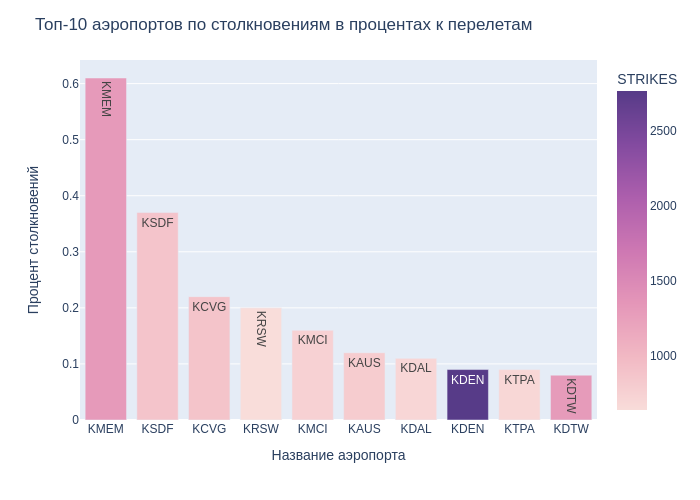

In [78]:
fig = px.bar(top_strikes,
             x='AIRPORT',
             y='STRIKES_PERCENT',
             color='STRIKES',
             text='AIRPORT',
             color_continuous_scale=px.colors.sequential.Purpor,
             hover_name='AIRPORT'
)
fig.update_layout(
    title='Топ-10 аэропортов по столкновениям в процентах к перелетам',
    xaxis_title="Название аэропорта",
    yaxis_title="Процент столкновений"
)
fig.show(renderer='png')

На графике выше мы видим, что есть лидер по соотношению столкновений к перелетам, и это аэропорт KMEM (Memphis International Airport). Процент столкновений относительно высокий (0.61%), тогда как у последнего в десятке - 0.08%. Самым большим по абсолютному значению столкновений оказался аэропорт KDEN (Denver International Airport), который занимает восьмое место. Этот аэропорт также выделен цветом.

### 2. География столкновений

Здесь и далее мы будем работать с годовыми и месячными значениями. Чтобы не получить дисбаланс, мы времененно ограничим наш диапазон значений birds_df и flights_df данными с 01.01.2018 по 31.12.2022, чтобы получился целый годовой цикл.

In [79]:
birds_df_time_frame = birds_df.query(
    'INCIDENT_DATE >= "2018-01-01" and INCIDENT_DATE <= "2022-12-31"'
)

In [80]:
flights_strikes_df_time_frame = (
    flights_strikes_df.query('YEAR >= 2018 & YEAR <= 2022')
)

Отобразим столкновения на карте.

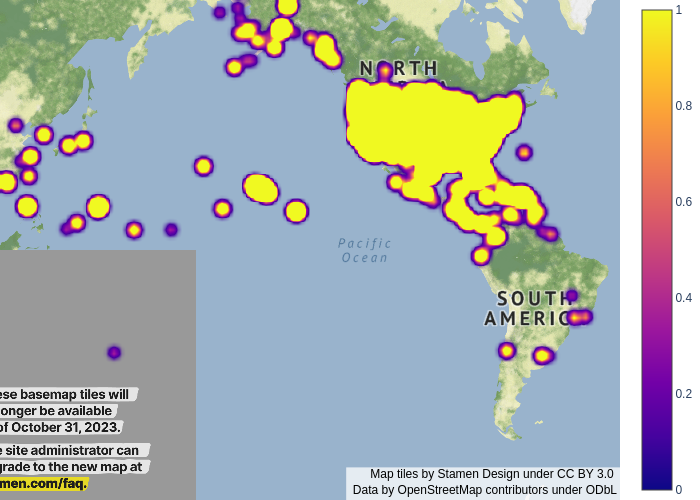

In [81]:
fig = go.Figure(go.Densitymapbox(lat=birds_df_time_frame['LATITUDE_x'], lon=birds_df_time_frame['LONGITUDE_x'],
                                 radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=220)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer='png')

Становится очевидно, что определенная часть столкновений происходила вдали от аэропортов и даже границ США.

Теперь посмотрим на карту тех аэропортов, для которых у нас есть статистика по перелетам (после предобработки остался 21 аэропорт).

Сначала загрузим [json файл со штатами США](https://www.kaggle.com/datasets/pompelmo/usa-states-geojson/data) для отображения карты. Файл создан Kate Gallo.

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
%cd '/content/drive/My Drive/Analytics/Practicum/bird_strikes_project/v2/'

/content/drive/My Drive/Analytics/Practicum/bird_strikes_project/v2


In [84]:
# читаем файл и сохраняем в переменной
with open('/content/drive/My Drive/Analytics/Practicum/bird_strikes_project/v2/us-states.json', 'r') as f:
    geo_json = json.load(f)

In [85]:
#print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

Теперь подготовим данные, необходимые для отображения легенды на карте.

In [86]:
airport_coordinates = {
    'KDFW': (32.8998, -97.0403),
    'KIAH': (29.9902, -95.3368),
    'KCLT': (35.2140, -80.9431),
    'KLAX': (33.9416, -118.4085),
    'KJFK': (40.6413, -73.7781),
    'KCVG': (39.0488, -84.6670),
    'KRSW': (26.5362, -81.7552),
    'KTPA': (27.9755, -82.5331),
    'KDTW': (42.2125, -83.3534),
    'KDEN': (39.8561, -104.6737),
    'KATL': (33.6407, -84.4277),
    'KSLC': (40.6413, -111.9279),
    'KMEM': (35.0426, -89.9767),
    'KDAL': (32.8471, -96.8512),
    'KORD': (41.9779, -87.9091),
    'KAUS': (30.2024, -97.6688),
    'KSEA': (47.4502, -122.3088),
    'KFLL': (26.0729, -80.1528),
    'KMCI': (39.2976, -94.7139),
    'KMCO': (28.4312, -81.3081),
    'KSDF': (38.1867, -85.7469)
}
airport_codes = ['KDFW',
                 'KIAH',
                 'KCLT',
                 'KLAX',
                 'KJFK',
                 'KCVG',
                 'KRSW',
                 'KTPA',
                 'KDTW',
                 'KDEN',
                 'KATL',
                 'KSLC',
                 'KMEM',
                 'KDAL',
                 'KORD',
                 'KAUS',
                 'KSEA',
                 'KFLL',
                 'KMCI',
                 'KMCO',
                 'KSDF']

location_names = ['Dallas/Fort Worth International Airport',
                  'George Bush Intercontinental Airport',
                  'Charlotte Douglas International Airport',
                  'Los Angeles International Airport',
                  'John F. Kennedy International Airport',
                  'Cincinnati/Northern Kentucky International Airport',
                  'Southwest Florida International Airport',
                  'Tampa International Airport',
                  'Detroit Metropolitan Wayne County Airport',
                  'Denver International Airport',
                  'Hartsfield-Jackson Atlanta International Airport',
                  'Salt Lake City International Airport',
                  'Memphis International Airport',
                  'Dallas Love Field',
                  "O'Hare International Airport",
                  'Austin-Bergstrom International Airport',
                  'Seattle-Tacoma International Airport',
                  'Fort Lauderdale-Hollywood International Airport',
                  'Kansas City International Airport',
                  'Orlando International Airport',
                  'Louisville Muhammad Ali International Airport']

# Датафрейм с данными локаций и названий аэропортов
airport_df = pd.DataFrame({
    'AIRPORT': ['KDFW', 'KIAH', 'KCLT', 'KLAX', 'KJFK', 'KCVG', 'KRSW', 'KTPA', 'KDTW', 'KDEN', 'KATL', 'KSLC', 'KMEM', 'KDAL', 'KORD', 'KAUS', 'KSEA', 'KFLL', 'KMCI', 'KMCO', 'KSDF'],
    'Latitude': [airport_coordinates[code][0] for code in airport_codes],
    'Longitude': [airport_coordinates[code][1] for code in airport_codes],
    'Name': [location_names[airport_codes.index(code)] for code in airport_codes]
})

Наконец, посмотрим где расположен 21 аэропорт из списка.

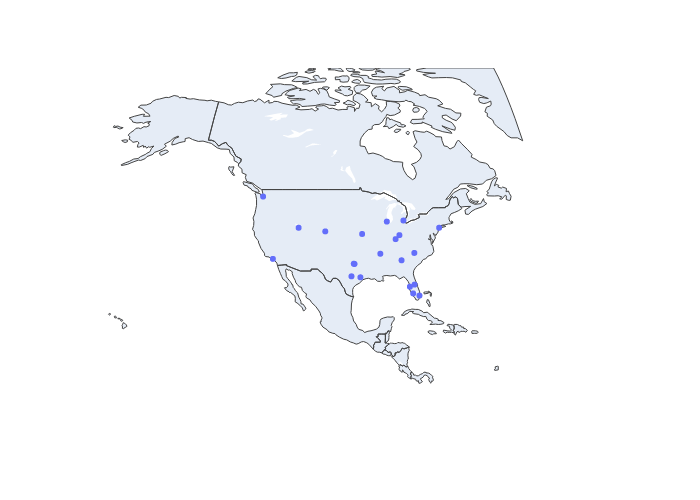

In [87]:
fig = px.scatter_geo(airport_df, lat="Latitude", lon="Longitude",
                     hover_name="Name",
                     projection="natural earth")

# Сделаем зум на США
fig.update_geos(center=dict(lon=-98, lat=38), scope="north america")

fig.show(renderer='png')

Географически аэропорты разбросаны по всему США, но большая часть все же на восточной половине.

Теперь отобразим график с цветовыми маркерами, которые будут указывать на процент столкновений среди перелетов.

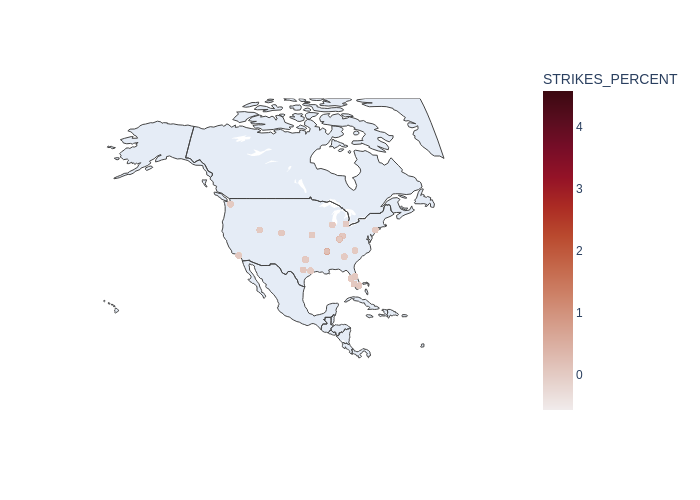

In [88]:
merged_df = airport_df.merge(flights_strikes_df_time_frame, on='AIRPORT')

fig = px.scatter_geo(merged_df, lat="Latitude", lon="Longitude",
                     hover_name="Name",
                     color="STRIKES_PERCENT",
                     color_continuous_scale="amp",
                     color_continuous_midpoint=2,
                     projection="natural earth")

fig.update_geos(center=dict(lon=-98, lat=38), scope="north america")

fig.show(renderer='png')


Мы видим, что на общем фоне выделяется только аэропорт Мэмфиса, который мы отметили ранее.

Посмотрим на динамику по проценту столкновений по месяцам.

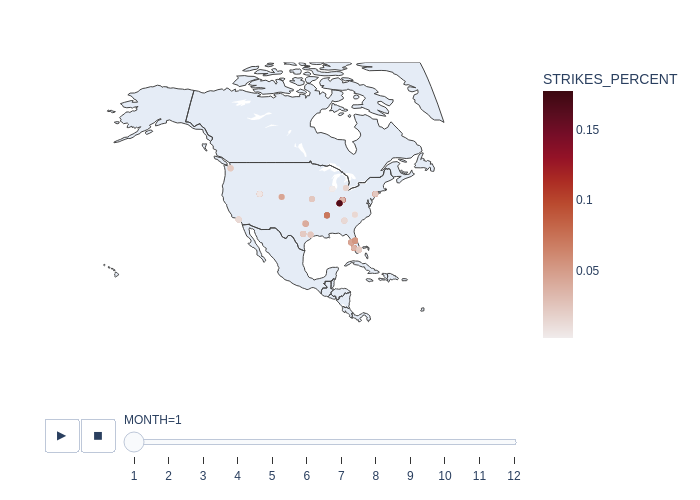

In [89]:
fig = px.scatter_geo(merged_df, lat="Latitude", lon="Longitude",
                     hover_name="Name",
                     color="STRIKES_PERCENT",
                     color_continuous_scale="amp",
                     animation_frame="MONTH",
                     projection="natural earth")

fig.update_geos(center=dict(lon=-98, lat=38), scope="north america")

fig.show(renderer='png')

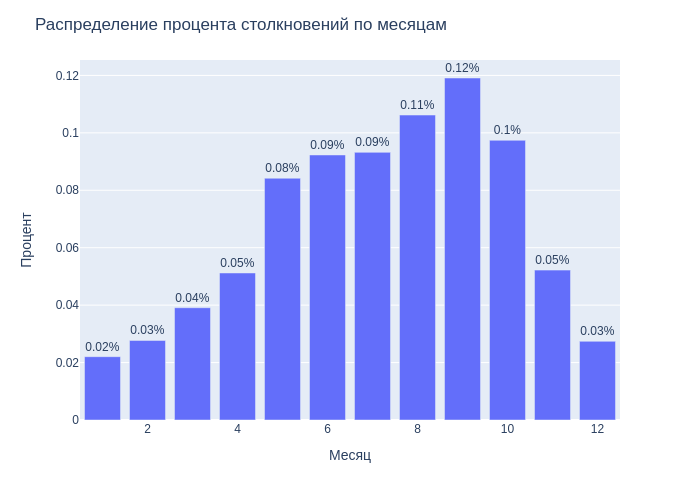

In [90]:
a = merged_df.groupby('MONTH').agg({'STRIKES_PERCENT':'median'}).reset_index()
fig = px.bar(
    a,
    x='MONTH',
    y='STRIKES_PERCENT',
    text=round(a['STRIKES_PERCENT'], 2).apply(lambda x: str(x) + '%'))
fig.update_layout(title='Распределение процента столкновений по месяцам',
                  xaxis_title="Месяц",
                  yaxis_title="Процент")
fig.update_traces(textfont_size=12,
                  textangle=0,
                  textposition="outside",
                  cliponaxis=False)
fig.show(renderer='png')

Исходя из графиков выше можно отметить, что процент столкновений усиливается к лету, причем географически непропорционально: на востоке и на юго-востоке США таких всплесков заметно больше. Это может говорить о том, что авиационная активность входит во взаимодействие с сезонными миграциями птиц.

Исследование можно продолжить в этом направлении, если наложить карту миграции на указанную выше.

### 3. Даты столкновений

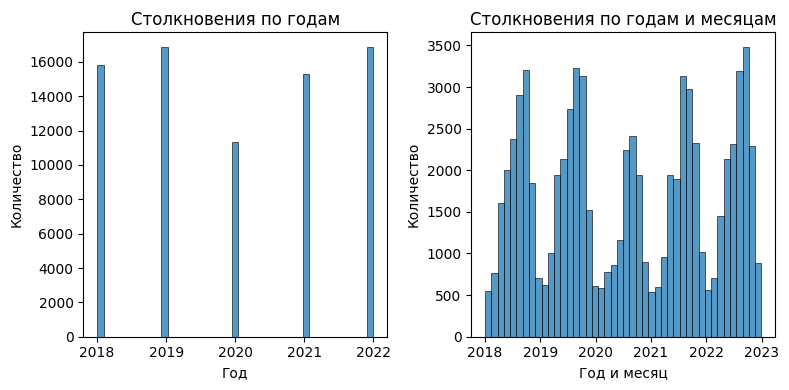

In [91]:
f, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(birds_df_time_frame, x="INCIDENT_YEAR", ax=axs[0])
axs[0].set_title('Столкновения по годам', fontsize=12)
axs[0].set_xlabel('Год', fontsize=10)
axs[0].set_ylabel('Количество', fontsize=10)

sns.histplot(birds_df_time_frame, x="INCIDENT_DATE", ax=axs[1])
axs[1].set_title('Столкновения по годам и месяцам', fontsize=12)
axs[1].set_xlabel('Год и месяц', fontsize=10)
axs[1].set_ylabel('Количество', fontsize=10)

f.tight_layout()

Из этих двух графиков становится понятно, что количество столкновений относительно стабильно на протяжении 5 лет (за исключением 2020 года), и в каждом году прослеживается отчетливая сезонность.

In [92]:
birds_df_year = (
    birds_df_time_frame.groupby("INCIDENT_YEAR")
    .agg({"INCIDENT_DATE": "count"})
    .rename(columns={"INCIDENT_DATE": "COUNT_PER_YEAR"})
    .reset_index()
)

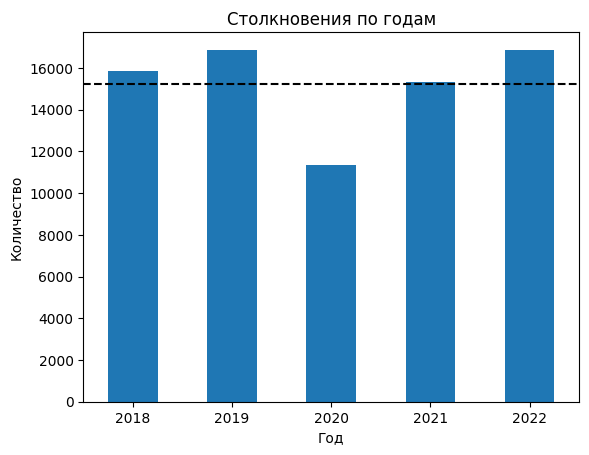

In [93]:
mean_val_year = birds_df_year['COUNT_PER_YEAR'].mean()

birds_df_year.plot(x='INCIDENT_YEAR',
                    y='COUNT_PER_YEAR',
                    kind='bar',
                    legend=False)
plt.title('Столкновения по годам', fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.xticks(rotation=0)
plt.axhline(y=mean_val_year, color='black', linestyle='dashed');

Из графика видно, что 2018-2019 и 2021-2022 почти идентичны по динамике столкновений. 2020 год заметно выделяется, что обусловлено внешними факторами (Covid-19). Пунктиром отмечена медиана значений за 5 лет.

In [94]:
birds_df_month = (
    birds_df_time_frame.groupby("INCIDENT_MONTH")
    .agg({"INCIDENT_DATE": "count"})
    .rename(columns={"INCIDENT_DATE": "COUNT_PER_MONTH"})
    .reset_index()
)

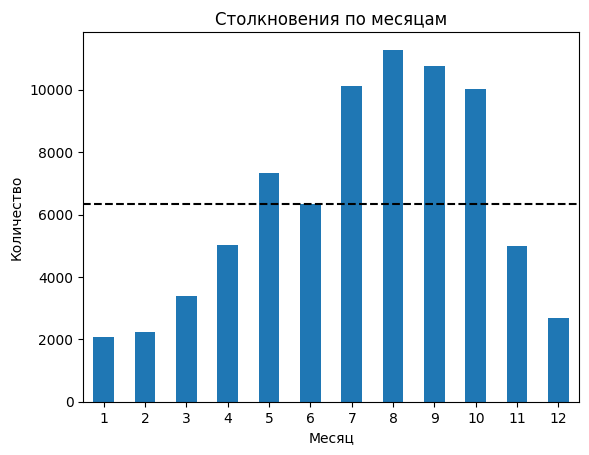

In [95]:
mean_val_month = birds_df_month['COUNT_PER_MONTH'].mean()

birds_df_month.plot(x='INCIDENT_MONTH',
                    y='COUNT_PER_MONTH',
                    kind='bar',
                    legend=False)
plt.title('Столкновения по месяцам', fontsize=12)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.xticks(rotation=0)
plt.axhline(y=mean_val_month, color='black', linestyle='dashed');

Здесь мы наблюдаем сезонность столкновений. Пик приходится на летние месяцы и начало осени (июль - октябрь), а меньше всего столкновений с середины и до конца зимы (январь - февраль). Пунктиром отмечена медиана значений за 5 лет.

#### 3.1. Динамика для топ-10 аэропортов

Посмотрим на динамику столкновений среди топ-10 аэропортов с 2018 по 2022.

In [96]:
top_strikes_per_year = (
    flights_strikes_df_time_frame[
        flights_strikes_df_time_frame["AIRPORT"]
        .isin(top_strikes["AIRPORT"])]
    .groupby(["AIRPORT", "YEAR"])
    .agg({"STRIKES_PERCENT": "mean"})
    .reset_index()
)


top_strikes_per_year.head()

,AIRPORT,YEAR,STRIKES_PERCENT
0,KAUS,2018,0.124683
1,KAUS,2019,0.137250
2,KAUS,2020,0.159908
3,KAUS,2021,0.098375
4,KAUS,2022,0.082392


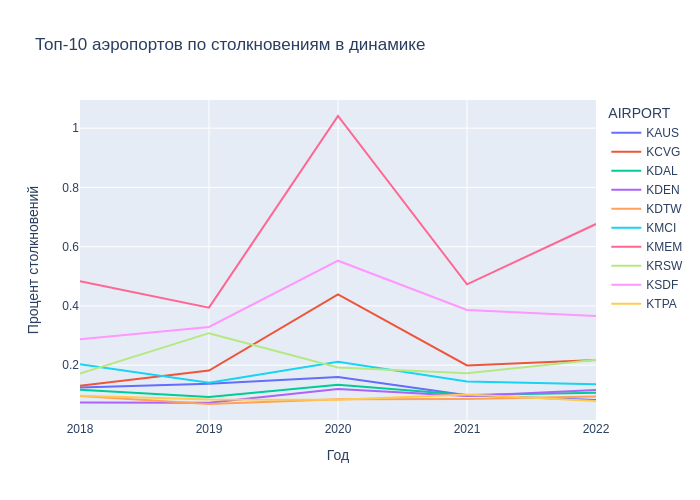

In [97]:
fig = px.line(top_strikes_per_year,
              x="YEAR",
              y="STRIKES_PERCENT",
              color="AIRPORT",
              labels={
                  'YEAR':'Год',
                  'STRIKES_PERCENT':'Процент столкновений'
              },
              title='Топ-10 аэропортов по столкновениям в динамике')
fig.update_layout(xaxis={'dtick': 1})
fig.show(renderer='png')

Мы видим, что год, отмеченный пандемией Covid-19, выделяется на фоне остальных. Оба лидера (аэропорт KMEM (Memphis International Airport) и аэропорт KSDF (Louisville Muhammad Ali International Airport)) не изменили своих позиций в рейтинге на протяжении всего периода.

Стоит посмотреть на динамику количества перелетов, чтобы понять, насколько сильно статистика по 2020 году отличается от других периодов.

In [98]:
num_flights_per_year = (
    flights_strikes_df_time_frame[
        flights_strikes_df_time_frame["AIRPORT"]
        .isin(top_strikes["AIRPORT"])]
    .groupby(["YEAR"])
    .agg({"TOTAL_FLIGHTS": "sum"})
    .reset_index()
)

num_flights_per_year.head()

,YEAR,TOTAL_FLIGHTS
0,2018,1765282
1,2019,1808172
2,2020,1109459
3,2021,1502381
4,2022,1628976


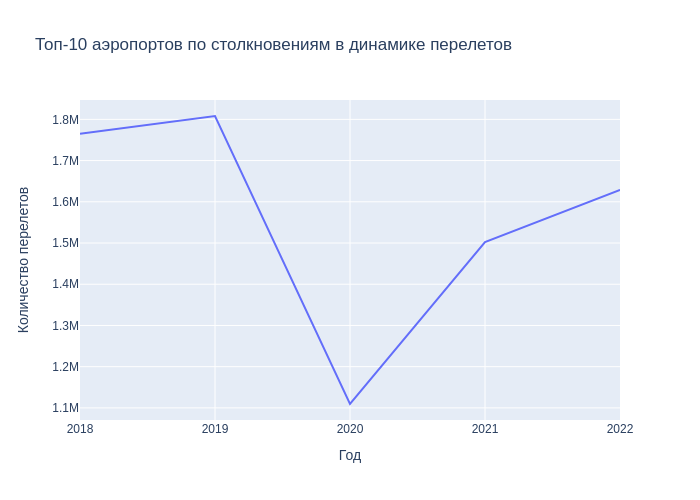

In [99]:
fig = px.line(num_flights_per_year, x="YEAR", y="TOTAL_FLIGHTS",
              labels={
                  'YEAR':'Год',
                  'TOTAL_FLIGHTS':'Количество перелетов'
              },
              title='Топ-10 аэропортов по столкновениям в динамике перелетов')
fig.update_traces(textposition="bottom right")
fig.update_layout(xaxis={'dtick': 1})
fig.show(renderer='png')

Количесто перелетов в 2020 году упало примерно в 1.5 раза, что также важно учитывать.

### 4. Время столкновений

#### 4.1. День/ночь

Посмотрим на статистику столкновений сначала в разрезе день/ночь. Для этого создадим столбец с категориями.

In [100]:
def categorize_time(time):
    if pd.isnull(time):
        return 'Unknown'
    elif (time >= pd.to_datetime('06:00:00').time()) \
                & (time < pd.to_datetime('18:00:00').time()):
        return '06:00-18:00'
    else:
        return '18:00-06:00'

In [101]:
birds_df.loc[:, 'TIME_PERIOD'] = birds_df['TIME'].apply(categorize_time)

In [102]:
time_period_counts = (
    birds_df['TIME_PERIOD'].value_counts()
    .reset_index()
    .rename(columns={'index':'TIME_PERIOD',
                     'TIME_PERIOD':'COUNT'})
)
time_period_counts.head()

,TIME_PERIOD,COUNT
0,06:00-18:00,46085
1,18:00-06:00,23191
2,Unknown,15507


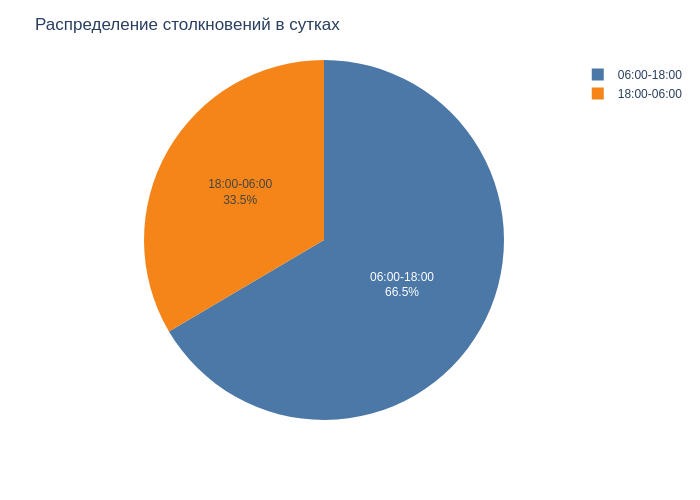

In [103]:
fig = px.pie(time_period_counts[:2],
             values='COUNT',
             names='TIME_PERIOD',
             color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    title='Распределение столкновений в сутках')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer='png')

Из графика мы видим, что столкновения происходят чаще в дневное время (66%). Часть значений отсутствует.

#### 4.2. По часам

Теперь обратимся к по-часовому срезу.

In [104]:
birds_df['TIME'] = pd.to_datetime(birds_df['TIME'],
                                format='%H:%M:%S',
                                errors='coerce')

In [105]:
birds_df['TIME'].dtype

dtype('<M8[ns]')

In [106]:
hourly_counts = (
    birds_df['TIME']
    .dt
    .strftime('%H')
    .value_counts()
    .reset_index()
    .rename(columns={'index':'HOUR',
                     'TIME':'COUNT'})
)

total = hourly_counts['COUNT'].sum()
hourly_counts['PERCENT'] = (hourly_counts['COUNT'] / total) * 100
hourly_counts = hourly_counts.sort_values('HOUR')

hourly_counts.head()

,HOUR,COUNT,PERCENT
18,00,1509,2.178244
19,01,1302,1.879439
21,02,864,1.247185
23,03,755,1.089844
22,04,767,1.107166


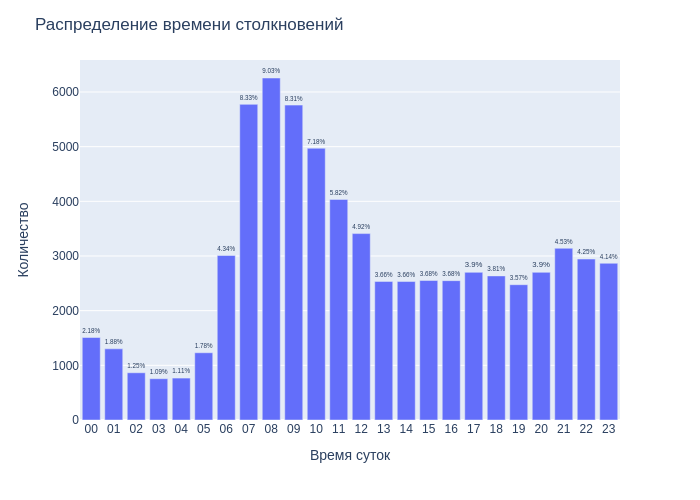

In [107]:
fig = px.bar(hourly_counts, x=hourly_counts['HOUR'], y=hourly_counts['COUNT'],
             text=round(hourly_counts['PERCENT'], 2).apply(lambda x: str(x) + '%'))
fig.update_layout(title='Распределение времени столкновений',
                  xaxis_title="Время суток",
                  yaxis_title="Количество")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show(renderer='png')

График смещен вправо. Наибольшее количество столкновений (~27%) выпадает на промежуток с 7:00 до 09:00 утра. После полуночи событий в два и более раз меньше, чем днем.

#### 4.3. Корреляции по времени суток для топ-10 аэропортов

Посмотрим, насколько выявленные выше различия позволяют говорить о зависимости столкновений от времени суток.

In [108]:
# Создание словарь с датафреймами по сезонам, который пригодится на следующем шаге
seasons = ['зима', 'весна', 'лето', 'осень']
months = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
season_data = {}
for i in range(len(seasons)):

    # Внутри словаря будет датафрейм для каждого сезона с количеством столкновений по времени
    season_data[seasons[i]] = (
    birds_df[
        (birds_df["INCIDENT_MONTH"].isin(months[i]))
        & (birds_df["AIRPORT_ID"].isin(top_strikes["AIRPORT"]))
    ]["TIME"]
    .dt.strftime("%H")
    .value_counts()
    .reset_index()
    .rename(columns={"index": "HOUR", "TIME": "COUNT"})
)

In [109]:
# Соединим уже имеющуюся таблицу в один датафрейм
all_data_top_airports = pd.concat(season_data.values(), keys=season_data.keys())

# Исправим формат часов на целочисленный
all_data_top_airports['HOUR'] = pd.to_numeric(all_data_top_airports['HOUR'])

# Посчитаем медиану количества столкновений для каждого часа
mean_count_by_hour = all_data_top_airports.groupby('HOUR')['COUNT'].mean()

print(mean_count_by_hour)

HOUR
0      61.75
1      46.00
2      33.50
3      36.75
4      29.00
5      35.00
6     140.50
7     265.00
8     276.75
9     241.50
10    154.50
11    133.50
12     92.25
13     64.50
14     64.25
15     61.50
16     65.00
17     66.50
18     69.50
19     66.00
20     58.00
21     57.00
22     90.00
23    109.00
Name: COUNT, dtype: float64


Распределение значений по часам неоднородно. Попробуем посчитать корреляции не для конкретного часа, а для времени суток.

❗Стоит отметить, что в данном случае мы будем объединять категориальные и числовые характеристики для решения задачи (методом one-hot encoding). Мы присвоим значение 1 переменной, когда наш объект совпадает с категорией, и 0 в противном случае. Здесь и далее для этого используется .get_dummies() из библиотеки pandas.

In [110]:
# Определим время суток
bins = [-1, 6, 12, 18, 24]
labels = ['Ночь', 'Утро', 'День', 'Вечер']

# Добавим колонку с временем суток в нашу таблицу
all_data_top_airports['PART_OF_DAY'] = pd.cut(all_data_top_airports['HOUR'], bins=bins, labels=labels)

# Добавим числовое значение, чтобы можно было рассчитать корряцию
dummies = pd.get_dummies(all_data_top_airports['PART_OF_DAY'])

# Посчитаем медианное значение столкновений для времени суток
mean_count_by_part_of_day = all_data_top_airports.groupby('PART_OF_DAY')['COUNT'].mean()

print(mean_count_by_part_of_day)


PART_OF_DAY
Ночь      54.642857
Утро     193.916667
День      65.208333
Вечер     76.000000
Name: COUNT, dtype: float64


Ночь    -0.257195
Утро     0.537611
День    -0.173068
Вечер   -0.100830
dtype: float64


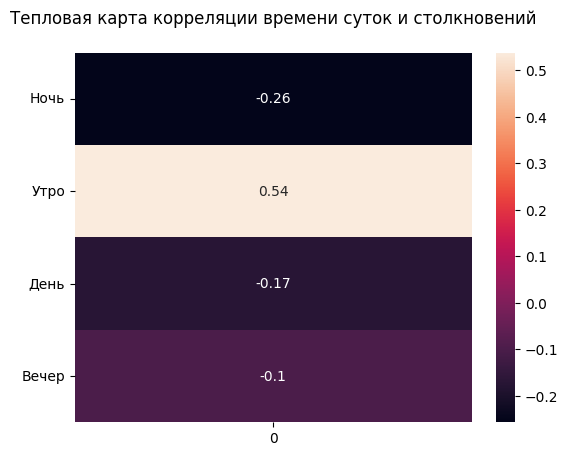

In [111]:
# Посчитаем матрицу корреляций
correlations = dummies.corrwith(all_data_top_airports['COUNT'])

print(correlations)

# Трансформируем объект Series, чтобы отобразить тепловую карту
correlations_df = correlations.to_frame()

# Рисуем тепловую карту корреляции
ax = sns.heatmap(correlations_df, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Тепловая карта корреляции времени суток и столкновений\n')

plt.show()

Из получившейся карты можно сделать следующие выводы для топ-10 аэропортов:
- Есть умеренная положительная зависимость (0.54) столкновений и утренних часов;
- Есть слабая отрицательная зависимость (-0.26) столкновений и ночных часов;
- В дневные и вечерние часы зависимость не преслеживается.

#### 4.4. По сезонам

Посмотрим на разницу в часах по сезонам, чтобы убедиться, насколько эта переменная зависит от природных циклов.

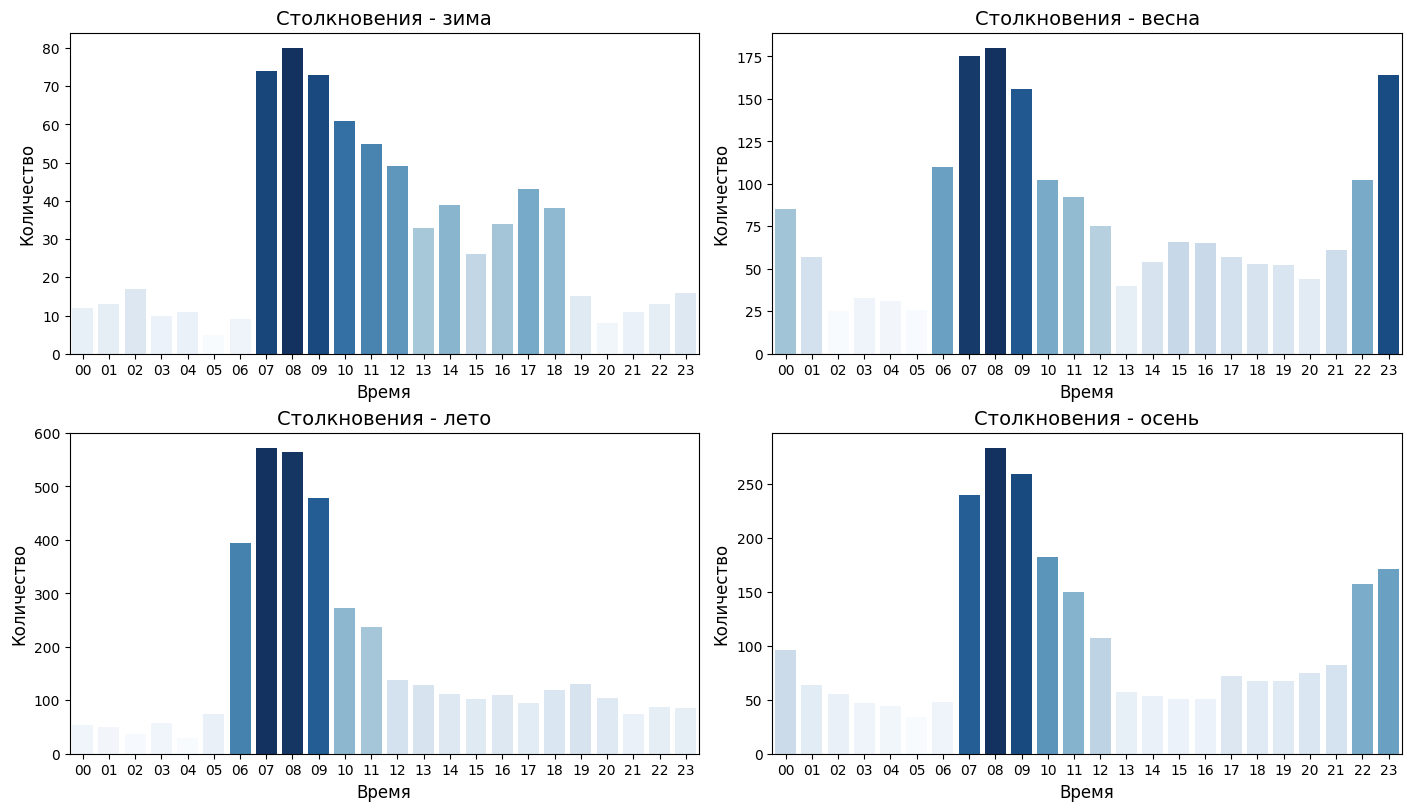

In [112]:
f, axs = plt.subplots(2, 2, figsize=(14, 8), constrained_layout = True)

# Создадим colormap
cmap = plt.get_cmap("Blues")

# Напишем цикл для отображения графиков
for i, season in enumerate(['зима', 'весна', 'лето', 'осень']):
    data = season_data[season].sort_values('HOUR')

    # Нормализуем колонку 'COUNT' в диапазоне от 0 до 1
    norm = plt.Normalize(data['COUNT'].min(), data['COUNT'].max())

    # Сопоставим полученные значения с цветами
    colors = cmap(norm(data['COUNT']))

    # Отобразим график
    sns.barplot(x='HOUR', y='COUNT', data=data, palette=colors, ax=axs[i // 2, i % 2])

    axs[i // 2, i % 2].set_title(f'Столкновения - {season}', fontsize=14)
    axs[i // 2, i % 2].set_xlabel('Время', fontsize=12)
    axs[i // 2, i % 2].set_ylabel('Количество', fontsize=12)

plt.show()

На графиках выше интересны два момента:
- пик столкновений (07:00-09:00 утра) не меняется от сезона к сезону;
- весной-осенью в вечерние часы столкновений становится больше, а в летние-зимние меньше.

Если обратить внимание на масштаб графиков выше (ось y), то становится ясно, что количество столкновений в каждый из сезонов заметно отличается. Построим графики ещё раз с учетом этого фактора.

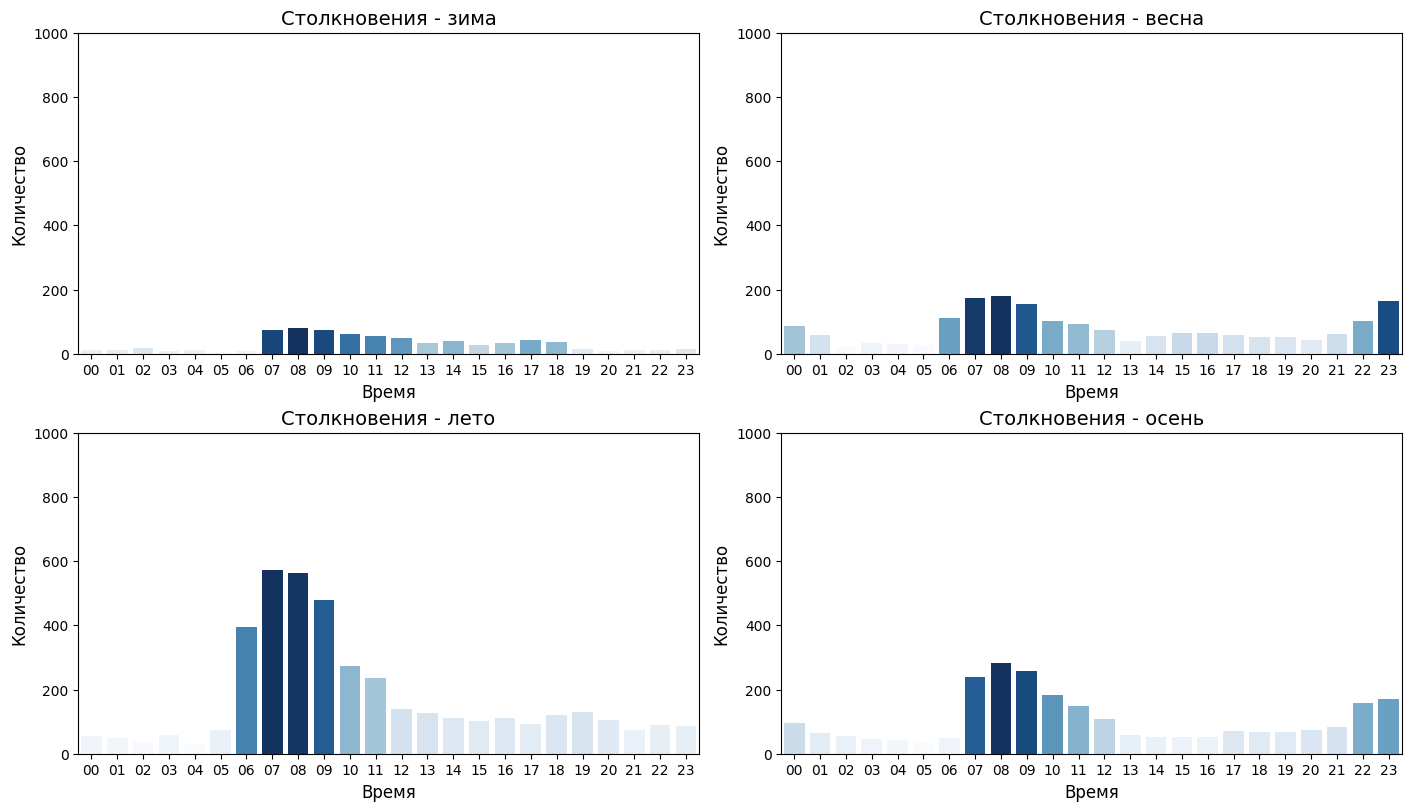

In [113]:
f, axs = plt.subplots(2, 2, figsize=(14, 8), constrained_layout = True)

# Создадим colormap
cmap = plt.get_cmap("Blues")

# Напишем цикл для отображения графиков
for i, season in enumerate(['зима', 'весна', 'лето', 'осень']):
    data = season_data[season].sort_values('HOUR')

    # Нормализуем колонку 'COUNT' в диапазоне от 0 до 1
    norm = plt.Normalize(data['COUNT'].min(), data['COUNT'].max())

    # Сопоставим полученные значения с цветами
    colors = cmap(norm(data['COUNT']))

    # Отобразим график
    sns.barplot(x='HOUR', y='COUNT', data=data, palette=colors, ax=axs[i // 2, i % 2])

    axs[i // 2, i % 2].set_title(f'Столкновения - {season}', fontsize=14)
    axs[i // 2, i % 2].set_xlabel('Время', fontsize=12)
    axs[i // 2, i % 2].set_ylabel('Количество', fontsize=12)
    axs[i // 2, i % 2].set_ylim([0, 1000])

plt.show()

Наблюдения:
- Количество столкновений набирает обороты к лету, а после идет на спад;
- Пик зимних столкновений в 5 раз меньше пика летних, а весенний в 1.5 раза меньше осеннего;
- Самый ярко выраженный дисбаланс наблюдается летом и осенью, тогда как зимой и весной количество относительно стабильно в течение дня.

#### 4.5. Корреляции по сезону года для топ-10 аэропортов

Теперь посмотрим, насколько выявленные выше различия позволяют говорить о зависимости столкновений от сезона года.

In [114]:
all_data_top_airports1 = (
    all_data_top_airports
    .reset_index()
    .rename(columns={'level_0':'SEASON'})
    .drop('level_1', axis=1)
    .sort_values(['SEASON', 'HOUR'])
)
all_data_top_airports1


,SEASON,HOUR,COUNT,PART_OF_DAY
32,весна,0,85,Ночь
37,весна,1,57,Ночь
47,весна,2,25,Ночь
44,весна,3,33,Ночь
45,весна,4,31,Ночь
...,...,...,...,...
85,осень,19,67,Вечер
82,осень,20,75,Вечер
81,осень,21,82,Вечер
77,осень,22,157,Вечер


In [115]:
mean_count_by_season = all_data_top_airports1.groupby('SEASON')['COUNT'].mean()
mean_count_by_season

SEASON
весна     79.375000
зима      31.041667
лето     171.166667
осень    104.625000
Name: COUNT, dtype: float64

весна   -0.094845
зима    -0.361724
лето     0.411994
осень    0.044576
dtype: float64


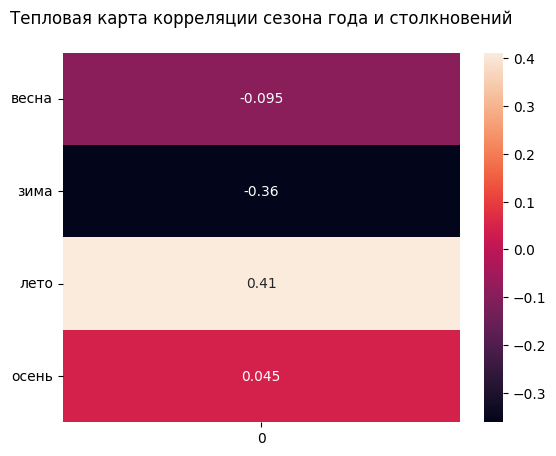

In [116]:
# Конвертируем качественную переменную в количественную
dummies = pd.get_dummies(all_data_top_airports1['SEASON'])

# Посчитаем матрицу корреляции
correlations = dummies.corrwith(all_data_top_airports1['COUNT'])

print(correlations)

# Трансформируем объект Series, чтобы отобразить тепловую карту
correlations_df = correlations.to_frame()

# Рисуем тепловую карту корреляции
ax = sns.heatmap(correlations_df, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Тепловая карта корреляции сезона года и столкновений\n')

plt.show()

Выводы по сезонам для топ-10 аэропортов:
- Умеренная положительная зависимость (0.41) столкновений и летнего периода;
- Умеренная отрицательная зависимость (-0.36) столкновений и зимнего периода;
- Весной и осенью зависимость выражена слабее.

#### 4.6. Проверка гипотезы №1

Проверим, может ли серьезность столкновений с птицами зависеть от времени столкновения. Даже если столкновения с птицами в ночное время происходят реже, они могут быть более опасными.

In [117]:
strikes_df['DAMAGE_LEVEL'].value_counts()

N     45089
M?     2957
M       453
S       239
D         7
Name: DAMAGE_LEVEL, dtype: int64

In [118]:
strikes_df['INDICATED_DAMAGE'].value_counts()

False    83196
True      3656
Name: INDICATED_DAMAGE, dtype: int64

В нашем случае есть 5 видов урона, полученного самолетом:
- N (нет урона);
- M (минимальный; если стоит знак вопроса, то степень урона не была определена -- такие случаи мы будем считать как минимальный урон);
- S (серьезный);
- D (максимальный).

Общее количество отмеченных повреждений совпадает со значениями столбца INDICATED_DAMAGE.

Нулевая гипотеза (H0): Нет существенной разницы в средней тяжести ущерба между ночными и дневными столкновениями.

Альтернативная гипотеза (H1): Средняя тяжесть ущерба различается при ночном и дневном столкновении.

In [119]:
# Создаем копию для работы
birds_df1 = birds_df.copy()

In [120]:
# Перевод категориальных значений в числовые
damage_mapping = {'N': 0, 'M?': 1, 'M': 1, 'S': 2, 'D': 3}
birds_df1['DAMAGE_NUM'] = birds_df1['DAMAGE_LEVEL'].map(damage_mapping)

In [121]:
birds_df1['DAMAGE_NUM'].value_counts()

0.0    44707
1.0     3269
2.0      220
3.0        6
Name: DAMAGE_NUM, dtype: int64

In [122]:
birds_df1['HOUR'] = birds_df1['TIME'].dt.strftime('%H').dropna().astype('int')

In [123]:
nighttime_group = birds_df1[
    (birds_df1['HOUR'] >= 18) | (birds_df1['HOUR'] <= 6)
].dropna(subset=["DAMAGE_NUM"])
daytime_group = birds_df1[
    (birds_df1['HOUR'] > 6) | (birds_df1['HOUR'] < 18)
    ].dropna(subset=["DAMAGE_NUM"])

In [124]:
nighttime_group['DAMAGE_NUM'].describe()

count    18941.000000
mean         0.069796
std          0.271268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: DAMAGE_NUM, dtype: float64

In [125]:
nighttime_group['DAMAGE_NUM'].var()

0.0735865949992995

In [126]:
daytime_group['DAMAGE_NUM'].describe()

count    41778.000000
mean         0.077074
std          0.284600
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: DAMAGE_NUM, dtype: float64

In [127]:
daytime_group['DAMAGE_NUM'].var()

0.08099723610752772

In [128]:
# Зафиксируем порождающий элемент для воспроизводимости теста
np.random.seed(40)

# Определим размер выборки
sample_size = 100

nighttime_sample = np.random.choice(nighttime_group['DAMAGE_NUM'],
                                    size=sample_size,
                                    replace=False)

daytime_sample = np.random.choice(daytime_group['DAMAGE_NUM'],
                                  size=sample_size,
                                  replace=False)

In [129]:
# Выполним двустороннюю t-проверку
results = st.ttest_ind(nighttime_sample, daytime_sample, equal_var=False)

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Нулевую гипотезу о том, что нет существенной разницы в ущербе \
между ночными и дневными столкновениями, следует отвергнуть (p < 0,05)")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.35332205791358173
Не получилось отвергнуть нулевую гипотезу


В результате двусторонней проверки методом Стюдента выяснилось, что статистически значимой разницы в характере ущерба между ночными и дневными столкновениями не обнаружено.

Тем не менее, из распределения значений ночной и дневной группы видно: самые серьезные столкновения никогда не происходили ночью.

### 5. Момент столкновения

Определим распределение столкновений по столбцу PHASE_OF_FLIGHT.

In [130]:
phase_of_flight = (
    birds_df['PHASE_OF_FLIGHT']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'PHASE',
                     'PHASE_OF_FLIGHT':'COUNT'})
)

phase_of_flight['PERCENT'] = (
    phase_of_flight['COUNT'] / phase_of_flight['COUNT'].sum() * 100
)

phase_of_flight

,PHASE,COUNT,PERCENT
0,Approach,20273,43.683337
1,Landing Roll,8462,18.233532
2,Take-off Run,6878,14.820401
3,Climb,5732,12.351053
4,En Route,1727,3.721261
5,Departure,1673,3.604904
6,Descent,668,1.439376
7,Local,495,1.066603
8,Arrival,298,0.642117
9,Taxi,172,0.370618


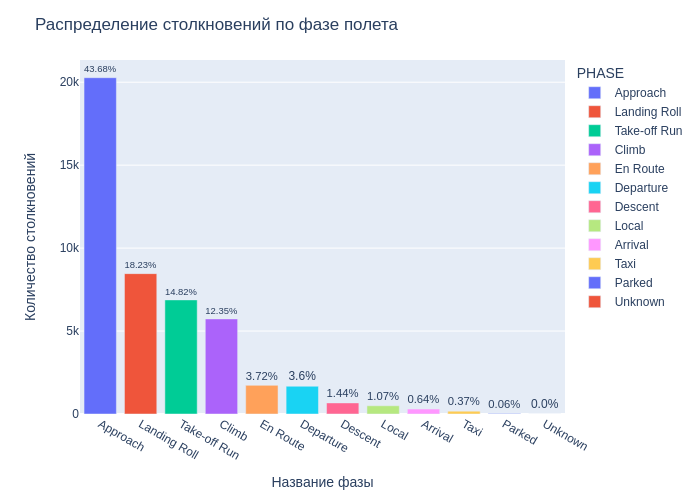

In [131]:
fig = px.bar(phase_of_flight,
             x='PHASE',
             y='COUNT',
             color='PHASE',
             text=round(phase_of_flight['PERCENT'], 2).apply(lambda x: str(x) + '%')
)
fig.update_layout(
    title='Распределение столкновений по фазе полета',
    xaxis_title="Название фазы",
    yaxis_title="Количество столкновений"
)
fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

fig.show(renderer='png')

Заход на посадку (Approach) лидирует с большим отрывом. Столкновения же с птицами на земле и в аэропорту происходят крайне редко.

##### 5.1. Корреляции для всех аэропортов

Посмотрим на связь фазы полета со столкновениями.

In [132]:
mean_count_by_phase_of_flight = phase_of_flight.groupby('PHASE')['COUNT'].mean()
mean_count_by_phase_of_flight

PHASE
Approach        20273.0
Arrival           298.0
Climb            5732.0
Departure        1673.0
Descent           668.0
En Route         1727.0
Landing Roll     8462.0
Local             495.0
Parked             29.0
Take-off Run     6878.0
Taxi              172.0
Unknown             2.0
Name: COUNT, dtype: float64

Approach        0.867811
Arrival        -0.188812
Climb           0.098631
Departure      -0.116079
Descent        -0.169240
En Route       -0.113222
Landing Roll    0.243041
Local          -0.178392
Parked         -0.203042
Take-off Run    0.159252
Taxi           -0.195478
Unknown        -0.204470
dtype: float64


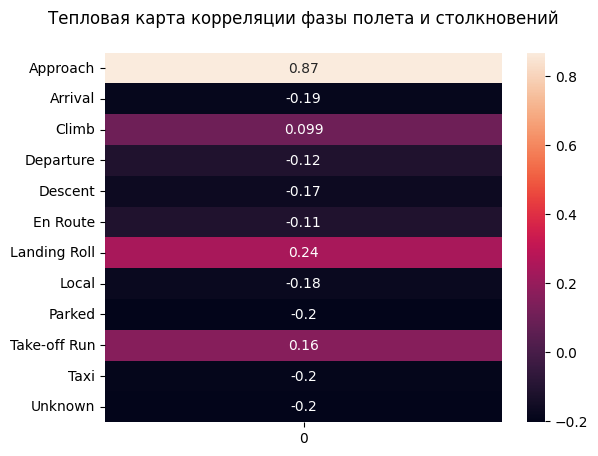

In [133]:
# Конвертируем качественную переменную в количественную
dummies = pd.get_dummies(phase_of_flight['PHASE'])

# Посчитаем матрицу корреляций
correlations = dummies.corrwith(phase_of_flight['COUNT'])

print(correlations)

# Трансформируем объект Series, чтобы отобразить тепловую карту
correlations_df = correlations.to_frame()

# Рисуем тепловую карту корреляции
ax = sns.heatmap(correlations_df, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Тепловая карта корреляции фазы полета и столкновений\n')

plt.show()

Тепловая карта корреляции показывает:
- Есть сильная положительная корряляция между фазой Approach и столкновениями, что ожидаемо;
- В остальных случаях связь слабая, местами отрицательная.

#### 5.2. Проверка гипотезы №2

Отойдем от полученной корреляции в сторону. Есть предположение, что столкновения с большей вероятностью приведут к серьезным повреждениям на этапе набора высоты (Climb), нежели на других этапах. Проверим эту гипотезу.

Нулевая гипотеза (H0): Степень повреждений от столкновений с птицами на этапе набора высоты существенно не отличается от степени повреждений на других этапах.

Альтернативная гипотеза (H1): Столкновения с птицами на этапе набора высоты отличаются по степени серьезности повреждений на других этапах.

In [134]:
birds_df2 = birds_df.copy()

In [135]:
birds_df2['PHASE_OF_FLIGHT'].isna().sum()

38374

In [136]:
climb_df = (
    birds_df1[birds_df1['PHASE_OF_FLIGHT'] == 'Climb']
    .dropna(subset=['PHASE_OF_FLIGHT', 'DAMAGE_NUM'])
)
other_phases_df = (
    birds_df1[birds_df1['PHASE_OF_FLIGHT'] != 'Climb']
    .dropna(subset=['PHASE_OF_FLIGHT', 'DAMAGE_NUM'])
)

In [137]:
# Зафиксируем порождающий элемент для воспроизводимости теста
np.random.seed(40)

# Определим размер выборки
sample_size = 30

climb_sample = np.random.choice(climb_df['DAMAGE_NUM'],
                                    size=sample_size,
                                    replace=False)

other_phases_sample = np.random.choice(other_phases_df['DAMAGE_NUM'],
                                  size=sample_size,
                                  replace=False)

In [138]:
print(climb_df['DAMAGE_NUM'].var())
print(other_phases_df['DAMAGE_NUM'].var())

0.14206540029788908
0.0819606688548521


In [139]:
# Выполним двустороннюю t-проверку
results = st.ttest_ind(climb_sample, other_phases_sample, equal_var=False)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Нулевую гипотезу следует отвергнуть (p < 0,05)")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.4751276106523823
Не получилось отвергнуть нулевую гипотезу


На основании проведенного теста можно сделать вывод, что есть статистически значимое различие между уровнем повреждений при наборе высоты и при других фазах полета.

In [140]:
climb_df['DAMAGE_NUM'].mean()

0.14720812182741116

In [141]:
other_phases_df['DAMAGE_NUM'].mean()

0.07615099925980755

В данном случае логично предположить, что это говорит о более серьезных, нежели менее серьезных, повреждениях на этапе набора высоты.

### 6. Высота полета

Тперь, когда мы разобрались, что фаза полета имеет большое значение, можно также отобразить фактор высоты.

In [142]:
birds_df3 = birds_df.copy()

In [143]:
birds_df3['HEIGHT'].isna().sum()

49326

<Axes: >

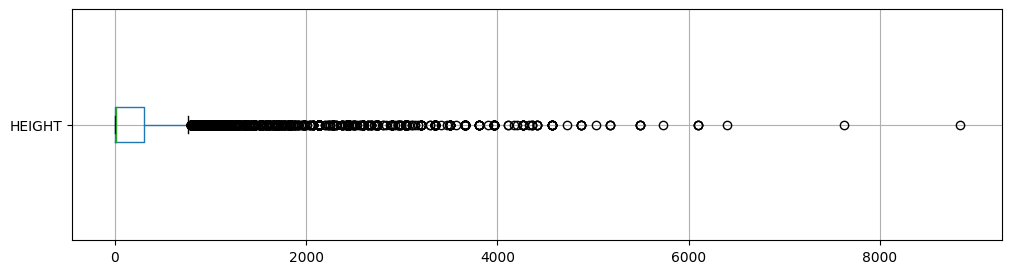

In [144]:
birds_df3.boxplot(column=['HEIGHT'], vert=False, figsize=(12, 3))

<Axes: >

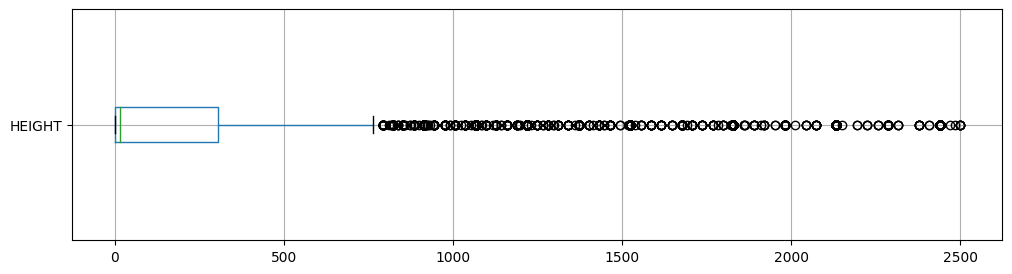

In [145]:
birds_df3.query('HEIGHT <= 2500').boxplot(column=['HEIGHT'], vert=False, figsize=(12, 3))

График с усами демонстрирует большой разброс значений по высоте полета. Причем, выбросы начинаются уже после 750м, что говорит о том, во время какой фазе происходит большинство столкновений. Мы уже убедились, что это был заход на посадку (Approach), который может начинаться на высоте до 1500 м.

In [146]:
# Разобьем высоту на категории для визуализации
bins = [0, 500, 1500, 5000, np.inf]
labels = ['0-500', '500-1500', '1500-5000', '5000+']

# Сохраним в новый столбец
birds_df3['HEIGHT_CATEGORY'] = pd.cut(birds_df['HEIGHT'],
                                     bins=bins,
                                     labels=labels)

In [147]:
height = (
    birds_df3['HEIGHT_CATEGORY']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'HEIGHT_CATEGORY',
                     'HEIGHT_CATEGORY':'COUNT'})
)

height['PERCENT'] = (
    height['COUNT'] / height['COUNT'].sum() * 100
)

height.head()

,HEIGHT_CATEGORY,COUNT,PERCENT
0,0-500,13560,68.127010
1,500-1500,4608,23.151125
2,1500-5000,1721,8.646503
3,5000+,15,0.075362


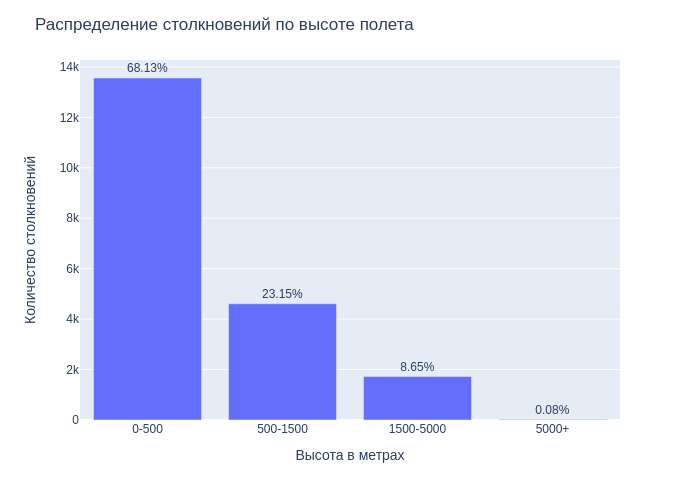

In [148]:

fig = px.bar(height,
             x='HEIGHT_CATEGORY',
             y='COUNT',
             text=round(height['PERCENT'], 2).apply(lambda x: str(x) + '%')
)

fig.update_layout(
    title='Распределение столкновений по высоте полета',
    xaxis_title="Высота в метрах",
    yaxis_title="Количество столкновений"
)
fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

fig.show(renderer='png')

Итак, наибольшее количество столкновений происходит на высоте до 500 метров (68%), тогда как после 1500м количество столкновений падает до ~8.7%.

#### 6.1. Корреляции для всех аэропортов

Определим зависимость столкновений от высоты полета.

0-500        0.949275
500-1500    -0.040696
1500-5000   -0.359959
5000+       -0.548620
dtype: float64


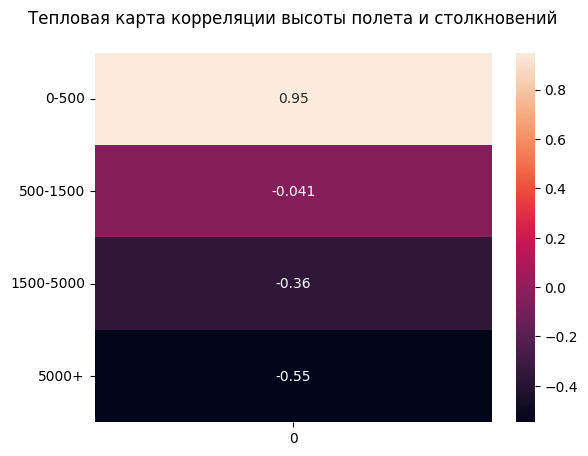

In [149]:
# Конвертируем качественную переменную в количественную
dummies = pd.get_dummies(height['HEIGHT_CATEGORY'])

# Посчитаем матрицу корреляций
correlations = dummies.corrwith(height['COUNT'])

print(correlations)

# Трансформируем объект Series, чтобы отобразить тепловую карту
correlations_df = correlations.to_frame()

# Рисуем тепловую карту корреляции
ax = sns.heatmap(correlations_df, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Тепловая карта корреляции высоты полета и столкновений\n')

plt.show()

Итак, мы получаем сильную зависимость количества столкновений и высоты полета. Причем, зависимость явно линейная.

### 7. Виды птиц

#### 7.1. Птицы и летучие мыши

Мы уже указали на тот факт, что в данном исследовании к птицам добавлены летучие мыши. Посмотрим на их представленность в общем числе столкновений.

In [150]:
# Виды летучих мышей
birds_df[
    (birds_df['SPECIES'].str.contains('bat'))
    &(~birds_df['SPECIES'].str.contains('albatross'))]['SPECIES'].unique()

array(['little brown bat', 'brazilian free-tailed bat',
       'free-tailed bats', 'hoary bat', 'unknown bird or bat',
       'microbats', 'vesper bats', 'eastern red bat',
       "pallas's mastiff bat", 'naked-rumped tomb bat', 'evening bat',
       'egyptian free-tailed bat', 'big brown bat', 'indiana bat',
       'tri-colored bat', 'silver-haired bat', 'black mastiff bat',
       'seminole bat', 'antillean fruit-eating bat', 'western red bat',
       'western mastiff bat', 'northern yellow bat', 'megabats',
       'african yellow bat', 'pocketed free-tailed bat',
       'broad-eared bat', 'gray bat', 'sinaloan mastiff bat',
       "wagner's bonneted bat", 'gray sac-winged bat', 'spotted bat',
       'angolan free-tailed bat', 'mauritian tomb bat',
       'lesser bulldog bat', 'sooty mustached bat'], dtype=object)

In [151]:
birds_df4 = birds_df.copy()

In [152]:
def categorize_bats(species):
    if pd.isna(species):
        return 'unknown'
    elif 'bat' in species and 'albatross' not in species:
        return 'Летучие мыши'
    else:
        return 'Птицы'

In [153]:
birds_df4.loc[:, 'BIRDS_OR_BATS'] = birds_df['SPECIES'].apply(categorize_bats)

In [154]:
birds_or_bats = (
    birds_df4['BIRDS_OR_BATS']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'SPECIES_TYPE',
                     'BIRDS_OR_BATS':'COUNT'})
)
birds_or_bats

,SPECIES_TYPE,COUNT
0,Птицы,82149
1,Летучие мыши,2634


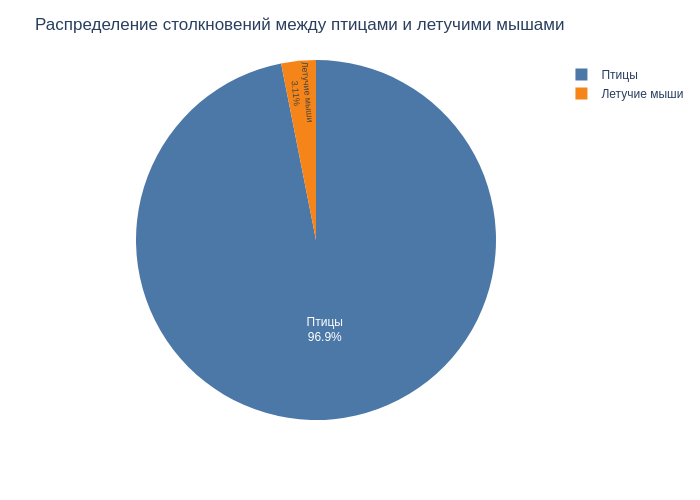

In [155]:
fig = px.pie(birds_or_bats,
             values='COUNT',
             names='SPECIES_TYPE',
             color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    title='Распределение столкновений между птицами и летучими мышами')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer='png')

Итак, летучие мыши представляют собой меньшинство, но тем не менее количество столкновений с ними не равно нулю.

#### 7.2. Птицы из топ-10 аэропортов

Найдем топ-10 птиц для топ-10 аэропортов. Интересно, сколько из них будут пересекаться.

In [156]:
species_per_airport = (
    birds_df[birds_df['AIRPORT_ID'].isin(top_strikes['AIRPORT'])]
    .groupby(['SPECIES', 'AIRPORT_ID'])
    .agg({'INCIDENT_DATE':'count'})
    .reset_index()
    .rename(columns={'INCIDENT_DATE':'COUNT'})
    .sort_values('COUNT', ascending=False)
)
species_per_airport.head()

,SPECIES,AIRPORT_ID,COUNT
361,horned lark,KDEN,1343
713,unknown bird,KMEM,372
743,unknown bird - small,KMEM,309
745,unknown bird - small,KSDF,282
774,western meadowlark,KDEN,243


In [157]:
top_species_per_airport = (
    species_per_airport
    .groupby('AIRPORT_ID')
    .apply(lambda x: x.nlargest(10, 'COUNT'))
    .reset_index(drop=True)
)
top_species_per_airport.head()

,SPECIES,AIRPORT_ID,COUNT
0,unknown bird,KAUS,175
1,unknown bird - small,KAUS,149
2,mourning dove,KAUS,131
3,barn swallow,KAUS,59
4,brazilian free-tailed bat,KAUS,56


In [158]:
# Птицы, которые есть во всех аэропортах из топ-10
species_in_all_airports = species_per_airport.groupby("SPECIES").filter(
    lambda x: x["AIRPORT_ID"].nunique() == species_per_airport["AIRPORT_ID"].nunique()
)
# Птицы, которые доминируют только в конкретном аэропорту
species_unique_to_airport = (
    species_per_airport.groupby('SPECIES').filter(
        lambda x: x['AIRPORT_ID'].nunique() == 1)
)

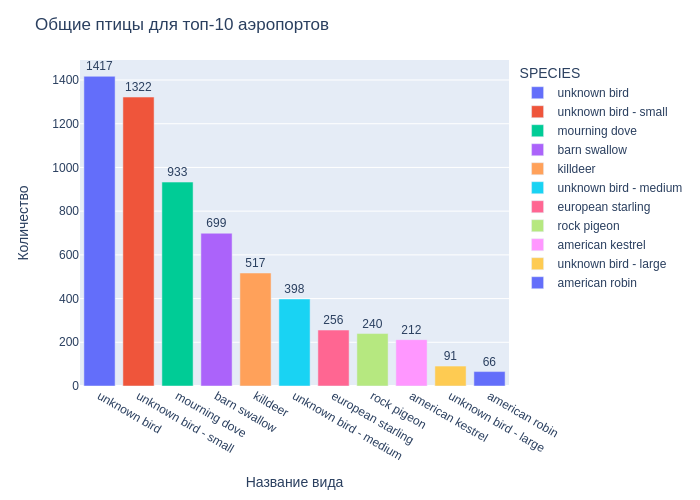

In [159]:
temp1 = (
    species_in_all_airports
    .groupby('SPECIES')['COUNT']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

fig = px.bar(temp1,
             x=temp1['SPECIES'],
             y=temp1['COUNT'],
             text=temp1['COUNT'],
             color=temp1['SPECIES'])
fig.update_layout(title='Общие птицы для топ-10 аэропортов',
                  xaxis_title="Название вида",
                  yaxis_title="Количество")
fig.update_traces(textfont_size=12,
                  textangle=0,
                  textposition="outside",
                  cliponaxis=False)
fig.show(renderer='png')

Мы видим, что неопределенные птицы разных размеров доминируют. Плачущая горлица (mourning dove) на третьем месте, затем идёт ласточка (barn swallow). Замыкает десятку малиновка (american robin).

### 8. Влияние погодных условий

Посмотрим на корреляции по агрегированным данным, чтобы найти
интересные закономерности.

Для этого построим матрицу корреляции по топ-10 аэропортам.

#### 8.1. Корреляции для топ-10 аэропортов

In [160]:
weather = birds_df[strikes_grouped['weather']]
weather.head()

,INCIDENT_DATE,AIRPORT_ID,WIND_DIRECTION_ANGLE,WIND_TYPE_CODE,WIND_SPEED_RATE,SKY_MIN_HEIGHT,SKY_HEIGHT_CODE,CEILING_AND_VISIBILITY_OKAY,VISIBILITY_DISTANCE,VISIBILITY_VARIABILITY,AIR_TEMPERATURE,AIR_TEMPERATURE_DEW_POINT,SEA_LEVEL_PRESSURE
0,2018-01-06,KDFW,150.0,N,2.1,22000.0,9,N,16000.0,9,2.8,-1.1,10253.0
1,2018-01-22,KIAH,300.0,N,2.6,22000.0,9,N,16000.0,9,16.1,8.9,10144.0
2,2018-01-09,KTEB,260.0,N,4.6,22000.0,9,N,16093.0,N,1.1,-3.9,10210.0
3,2018-01-10,KPGD,20.0,N,1.5,61.0,W,N,1207.0,N,15.6,15.0,NaN
4,2018-01-18,KCLT,320.0,N,2.1,NaN,9,N,16000.0,9,-11.1,-13.9,10273.0


In [161]:
top_strikes.head()

,AIRPORT,TOTAL_FLIGHTS,STRIKES,STRIKES_PERCENT
0,KMEM,244141,1315,0.61
1,KSDF,246610,883,0.37
2,KCVG,446897,887,0.22
3,KRSW,392161,636,0.20
4,KMCI,462882,756,0.16


In [162]:
weather_grouped_airports = (
    weather[birds_df['AIRPORT_ID'].isin(top_strikes['AIRPORT'])]
    .groupby('AIRPORT_ID')
    .agg({'WIND_DIRECTION_ANGLE':'median',
         'WIND_SPEED_RATE':'median',
         'SKY_MIN_HEIGHT':'median',
         'VISIBILITY_DISTANCE':'median',
         'AIR_TEMPERATURE':'median',
         'AIR_TEMPERATURE_DEW_POINT':'median'})
    .reset_index()
    .rename(columns={'AIRPORT_ID':'AIRPORT'})
)
weather_grouped_airports.head()

,AIRPORT,WIND_DIRECTION_ANGLE,WIND_SPEED_RATE,SKY_MIN_HEIGHT,VISIBILITY_DISTANCE,AIR_TEMPERATURE,AIR_TEMPERATURE_DEW_POINT
0,KAUS,170.0,3.1,22000.0,16093.0,23.3,18.9
1,KCVG,200.0,3.1,22000.0,16093.0,19.4,15.0
2,KDAL,160.0,3.6,22000.0,16093.0,23.9,17.8
3,KDEN,210.0,4.1,22000.0,16093.0,16.1,5.6
4,KDTW,210.0,2.6,6706.0,16000.0,19.2,13.9


In [163]:
all_data_weather = pd.merge(weather_grouped_airports, top_strikes[['AIRPORT', 'STRIKES_PERCENT']], how='outer', on='AIRPORT')
all_data_weather.head()

,AIRPORT,WIND_DIRECTION_ANGLE,WIND_SPEED_RATE,SKY_MIN_HEIGHT,VISIBILITY_DISTANCE,AIR_TEMPERATURE,AIR_TEMPERATURE_DEW_POINT,STRIKES_PERCENT
0,KAUS,170.0,3.1,22000.0,16093.0,23.3,18.9,0.12
1,KCVG,200.0,3.1,22000.0,16093.0,19.4,15.0,0.22
2,KDAL,160.0,3.6,22000.0,16093.0,23.9,17.8,0.11
3,KDEN,210.0,4.1,22000.0,16093.0,16.1,5.6,0.09
4,KDTW,210.0,2.6,6706.0,16000.0,19.2,13.9,0.08


In [164]:
# Считаем матрицу корреляции для указанных столбцов
corr_matrix = all_data_weather.corr()

print(corr_matrix)

                           WIND_DIRECTION_ANGLE  WIND_SPEED_RATE  \
WIND_DIRECTION_ANGLE                   1.000000         0.295656   
WIND_SPEED_RATE                        0.295656         1.000000   
SKY_MIN_HEIGHT                        -0.335077         0.333333   
VISIBILITY_DISTANCE                   -0.335077         0.333333   
AIR_TEMPERATURE                       -0.788915        -0.505531   
AIR_TEMPERATURE_DEW_POINT             -0.772859        -0.628466   
STRIKES_PERCENT                        0.035397        -0.182737   

                           SKY_MIN_HEIGHT  VISIBILITY_DISTANCE  \
WIND_DIRECTION_ANGLE            -0.335077            -0.335077   
WIND_SPEED_RATE                  0.333333             0.333333   
SKY_MIN_HEIGHT                   1.000000             1.000000   
VISIBILITY_DISTANCE              1.000000             1.000000   
AIR_TEMPERATURE                  0.268674             0.268674   
AIR_TEMPERATURE_DEW_POINT        0.167746             0.167

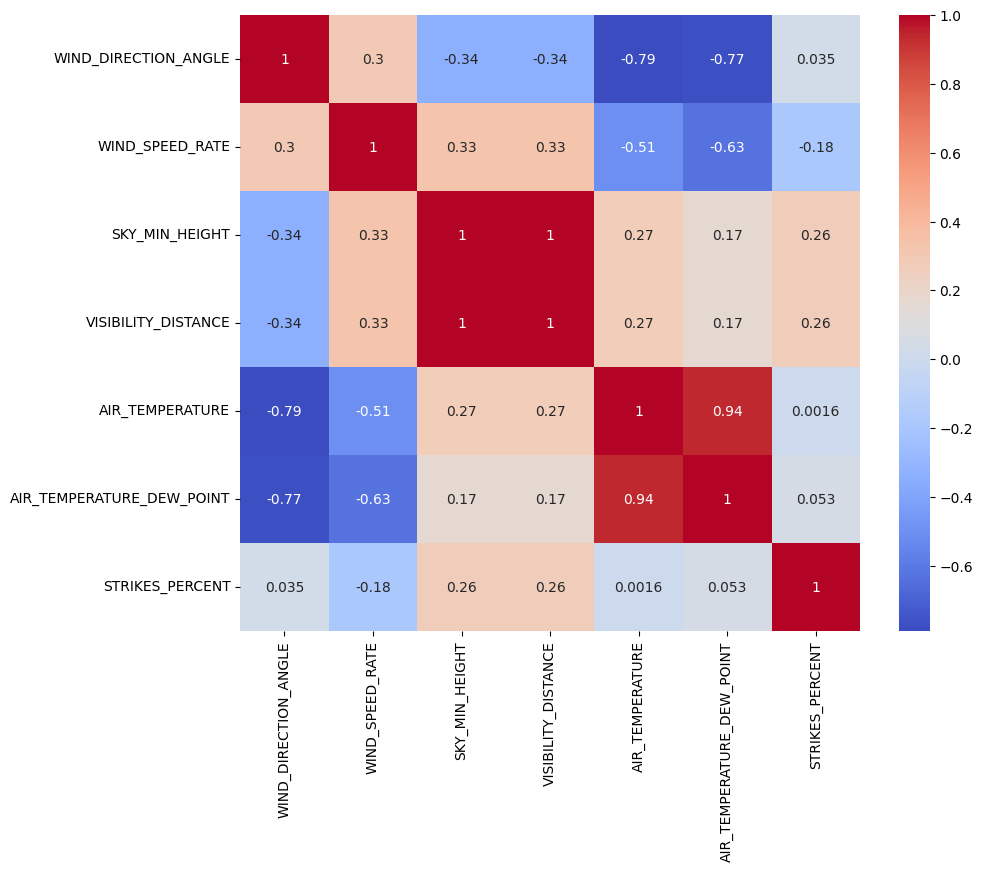

In [165]:
# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


На основании получившейся тепловой карты корреляции, мы можем сказать следующее:
- Присутствуют понятные сильные корряляции между природными явлениями (например, видимость и расстояние до облаков -- чем меньше облаков, тем больше видимость; или же температура воздуха и температура точки росы -- чем выше температура, тем выше относительная влажность)
- В отношении столкновений выделяются слабые положительные корреляции с расстоянием до ближайшего облака и видимостью.

## Общие выводы

#### 1. Выводы по предобработке

Данные из таблиц **получены и обработаны**:

*   strikes_df содержит 86852 строки, flights_df содержит 11461 строки;

*   Произведена проверка на пропуски (оставлены) и дубликаты (устранены);

*   Добавлены новые столбцы с погодой, которые до этого находились в свернутом виде;

*   В столбцах с погодой изменены типы данных, величинам возвращена стандартная размерность;

*   Отобраны и сгруппированы релеватные для различных направлений исследования столбцы (flights, damage, species, weather);

*   Обработаны столбцы с датами и временем;

Также:

*   Создан и выгружен новый датафрейм birds_df, который включает птиц и летучих мышей. Потеряно ~2% данных.

*   Создан и выгружен датафрейм flights_strikes_df, который включает в себя даннные двух таблиц: агрегированные данные о перелетах в 21 аэропорту, объединенные с данными о столкновениях с птицами и летучими мышами. Один аэропорт был удален из-за выбросов.

#### 2. Выводы по анализу данных

**Топ-10 аэропортов**.

- Выделены топ-10 аэропортов по процентному соотношению столкновений к перелетам. Лидер по соотношению столкновений к перелетам, и это аэропорт KMEM (Memphis International Airport). Процент столкновений относительно высокий (0.62%), тогда как у последнего в десятке - 0.08%. Самым большим по абсолютному значению столкновений оказался аэропорт KDEN (Denver International Airport), который занимает восьмое место.

**География столкновений**

- Географически аэропорты разбросаны по всему США. Процент столкновений усиливается к лету, причем непропорционально: на востоке и на юго-востоке США таких всплесков заметно больше. Это может говорить о том, что авиационная активность входит во взаимодействие с сезонными миграциями птиц. Исследование можно продолжить в этом направлении, если наложить карту миграции на указанную выше.

**Количество столкновений**

- Статистика по количеству столкновений за прошедшие 5 лет меняется незначительно. Исключение 2020 год, где было мало перелетов и данные этим искажены. Наблюдается сезонность столкновений. Пик приходится на лето и начало осени, а зимой количество столкновекий резко падает.

**Время**

- Время столкновений говорит нам о том, что большинство происходит в промежуток от 06:00 и до 18:00 (66%), но данные о времени неполные;

- По-часовый анализ показывает, что в утренние часы с 07:00 до 10:00 вероятность столкновений максимальная, а в промежутке с 00:00 и до 05:00 минимальная;

- Тепловая карта корреляции времени суток и столкновений показала зависимости для топ-10 аэропортов: есть умеренная положительная зависимость (0.54) столкновений и утренних часов, и слабая отрицательная зависимость (-0.26) столкновений и ночных часов;

- Рассмотрение времени в разрезе времен года для топ-10 аэропортов продемонстрировало важный факт: пик столкновений по времени не меняется от сезона к сезону (иными словами, это универсальный фактор); в то же время весной-осенью в вечерние часы столкновений становится больше, а в летние-зимние меньше.

**Проверка гипотезы №1**

- С временем связана первая гипотеза: может ли серьезность столкновений с птицами зависеть от времени столкновения? Использовалась временная шкала 06:00-18:00 (день) и 18:00-06:00 (ночь). Для подготовки к тестированию был обработан столбец DAMAGE_NUM, его значения переведены в числовой вид, причем "М?" трансформирован в 1 (поскольку урон был нанесен, хотя и неизвестно какого масштаба). В качестве методики тестирования использовался t-критерий Стьюдента, сравнивались средние двух генеральных совокупностей по выборкам. Созданы рандомизированные выборки для каждой группы (n=100). Статистически значимой разницы в характере ущерба между ночными и дневными столкновениями не обнаружено.

**Момент столкновения**

- Построен график распределения столкновений по фазе полета. Заход на посадку (Approach) лидирует с большим отрывом. Столкновения же с птицами на земле и в аэропорту происходят крайне редко. Тепловая карта корреляции показала: имеется сильная положительная корряляция между фазой Approach и столкновениями, что ожидаемо; в остальных случаях связь слабая, местами отрицательная.

**Проверка гипотезы №2**

- С фазами полета связана вторая гипотеза: могут ли столкновения с большей вероятностью привести к серьезным повреждениям, если они происходят на этапе набора высоты (Climb)? При подготовке к проверке была произведена фильтрация по столбцу PHASE_OF_FLIGHT на фазу набора высоты (1) и другие фазы (2). Метод проверки схож с предыдущей гипотезой. Также сделаны рандомные выборки (n=100). Интересно, что тест зафиксировал статистически значимое различие между уровнем повреждений при наборе высоты и при других фазах полета. Иными словами, хотя на фазу набора высоты приходится ~12% всех столкновений, вероятность получить более серьезные повреждения возрастает.

**Высота полета**.

- Обработан столбец HEIGHT: футы переведены в метры. График распределения по высоте показывает: наибольшее количество столкновений происходит на высоте до 500 метров (68%), ещё 23% располагаются на высоте от 500 до 1500 метров, после 1500м количество столкновений падает до ~8.6%. Есть четкая линейная зависимость столкновений от высоты: чем дальше от отметки в 500м, тем их меньше.

**Виды птиц**.

- Среди отобранных видов летучие мыши представляют собой меньшинство, но тем не менее количество столкновений с ними не равно нулю (~3%);

- Найдены наиболее встречающиеся виды птиц среди отобранных аэропортов. Неопределенные птицы разных размеров доминируют: возможно, на момент регистрации они ещё находились в исследовательском институте. Плачущая горлица (mourning dove) на третьем месте, затем идёт ласточка.

**Влияние погодных условий**.

- Присутствуют объяснимые сильные корряляции между природными явлениями (например, видимость и расстояние до облаков -- чем меньше облаков, тем больше видимость; или же температура воздуха и температура точки росы -- чем выше температура, тем выше относительная влажность);

- В отношении столкновений выделяются слабые положительные корреляции с расстоянием до ближайших облаков и видимостью.

#### 3. Перспективы исследования

Исходя из полученных результатов можно предложить несколько траекторий, по которым может двигаться дальнейшее исследование:

- Наложить карту миграции на карту со столкновениями для топ-10 аэропортов, чтобы выяснить, насколько эти факторы пересекаются;

- Определить, какие части самолета подвергаются столкновениям чаще других, какие виды самолетов более уязвимы;

- Посмотреть на статистику с аэропортами, которые не входят в топ: 2020 год показал, что падение количества перелетов может не сопровождаться кратным падением процента столкновений, а значит есть вероятность, что менее загруженные аэропорты будут демонстрировать более высокий процент столкновений;

- Детальнее проанализировать корреляции между погодными условиями и столкновениями.